# Visualize the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
train = pd.read_csv('../data/train.csv',header=0)
test = pd.read_csv('../data/test.csv',header=0)

/var/folders/2r/vz71dl552fd4t6lk1z7s6_bh0000gn/T/ipykernel_93672/1621859618.py:1: DtypeWarning: Columns (435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../data/train.csv',header=0)


In [3]:
train.dtypes

id                object
p_num             object
time              object
bg-5:55          float64
bg-5:50          float64
                  ...   
activity-0:15     object
activity-0:10     object
activity-0:05     object
activity-0:00     object
bg+1:00          float64
Length: 508, dtype: object

In [4]:
total= train.size
#Number of missing values per column
missingCount = train.isnull().sum()
#Total number of missing values
missing_tot = missingCount.sum()

# Calculate percentage of missing values
print("The dataset contains", round(((missing_tot/total) * 100), 2), "%", "missing values")

# keeping only the columns with missing values>0 
missing = missingCount[missingCount > 0] 
print(missing)

The dataset contains 44.81 % missing values
bg-5:55           27254
bg-5:50           18491
bg-5:45           13660
bg-5:40           27258
bg-5:35           18770
                  ...  
activity-0:20    174270
activity-0:15    174293
activity-0:10    174287
activity-0:05    174271
activity-0:00    174287
Length: 504, dtype: int64


In [5]:
print(train.shape)

(177024, 508)


In [6]:
print(train.p_num.value_counts().sort_index())

p_num
p01     8459
p02    25872
p03    26028
p04    24686
p05     8288
p06     8383
p10    25454
p11    24555
p12    25299
Name: count, dtype: int64


In [7]:
print(test.p_num.value_counts().sort_index())

p_num
p01    244
p02    227
p04    258
p05    276
p06    234
p10    179
p11    221
p12    288
p15    294
p16    248
p18    231
p19    246
p21    236
p22    201
p24    261
Name: count, dtype: int64


15, 16, 18, 19, 21, 22, 24 are new

In [8]:
# Transform the time in minutes starting a midnight
train['time'] = pd.to_datetime(train['time'], format='%H:%M:%S')
test['time'] = pd.to_datetime(test['time'], format='%H:%M:%S')

train['hour'] = train.time.apply(lambda x : x.hour)
test['hour'] = test.time.apply(lambda x : x.hour)

train['time_min'] = train['time'].dt.hour * 60 + train['time'].dt.minute
test['time_min'] = test['time'].dt.hour * 60 + test['time'].dt.minute


## Exploration of the target variable

In [28]:
target = 'bg+1:00'

In [32]:
# Stats of the target variable
train[target].describe()

count    177024.000000
mean          8.277045
std           2.996398
min           2.200000
25%           6.100000
50%           7.700000
75%           9.900000
max          27.800000
Name: bg+1:00, dtype: float64

### Distributions

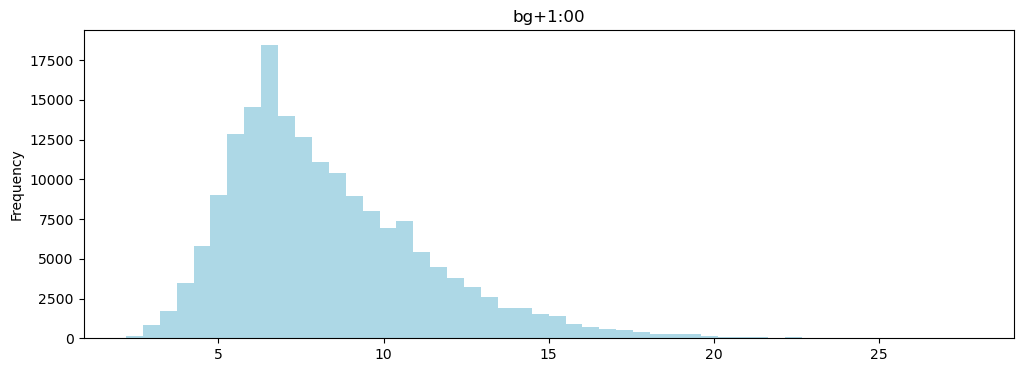

In [57]:
# Distribution of the target variable
plt.figure(figsize=(12,4))
train[target].plot(kind='hist', bins=50,
                      color="lightblue")
plt.title(target)
plt.show()

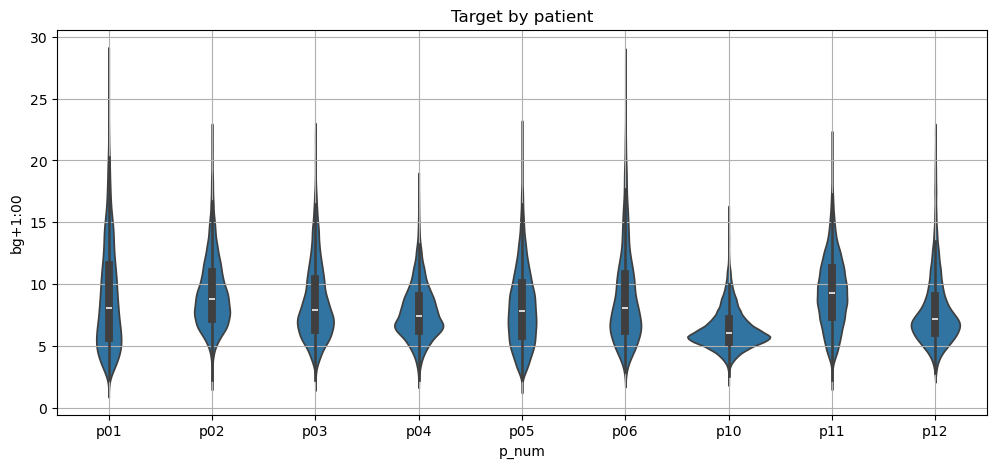

In [37]:
# Distribution of the target variable over each patient
plt.figure(figsize = (12,5))

sns.violinplot(data = train, x = "p_num", y = target)
plt.title("Target by patient")
plt.grid()

plt.show()

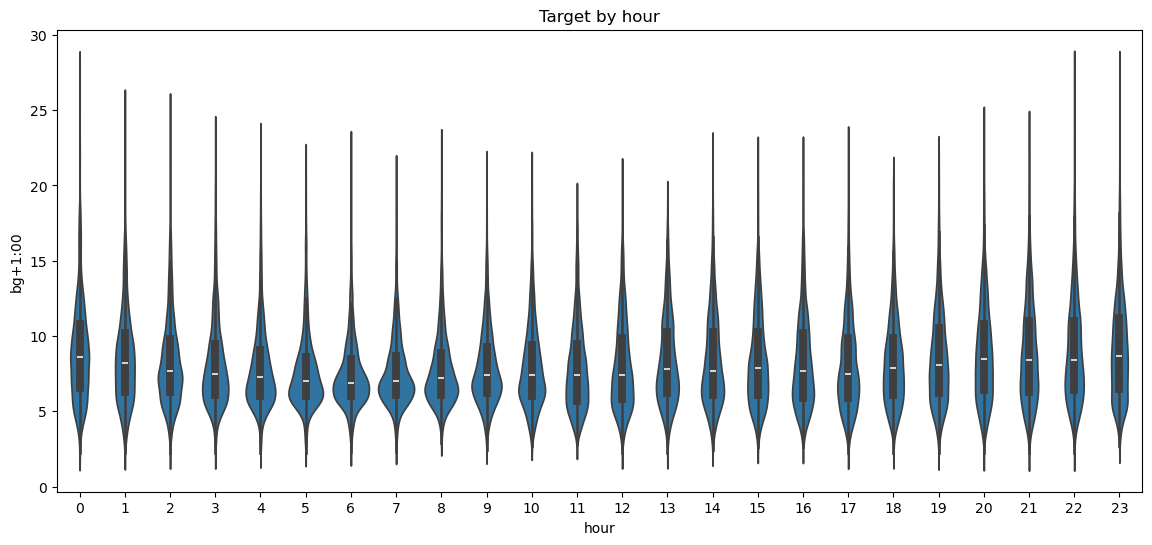

In [36]:
# Distribution of the target variable over time
plt.figure(figsize = (14,6))

sns.violinplot(data = train, x = "hour", y = target)
plt.title("Target by hour")

plt.show()

### Evolution over time by patient

#### Scatterplot

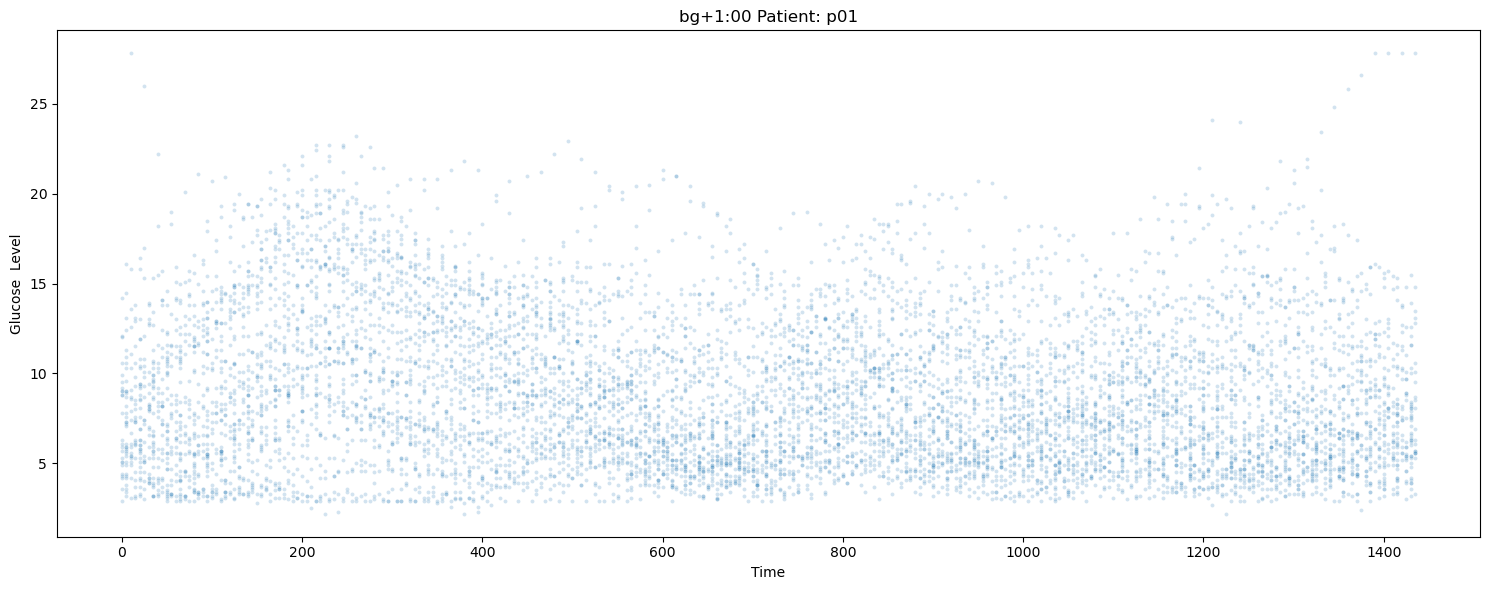

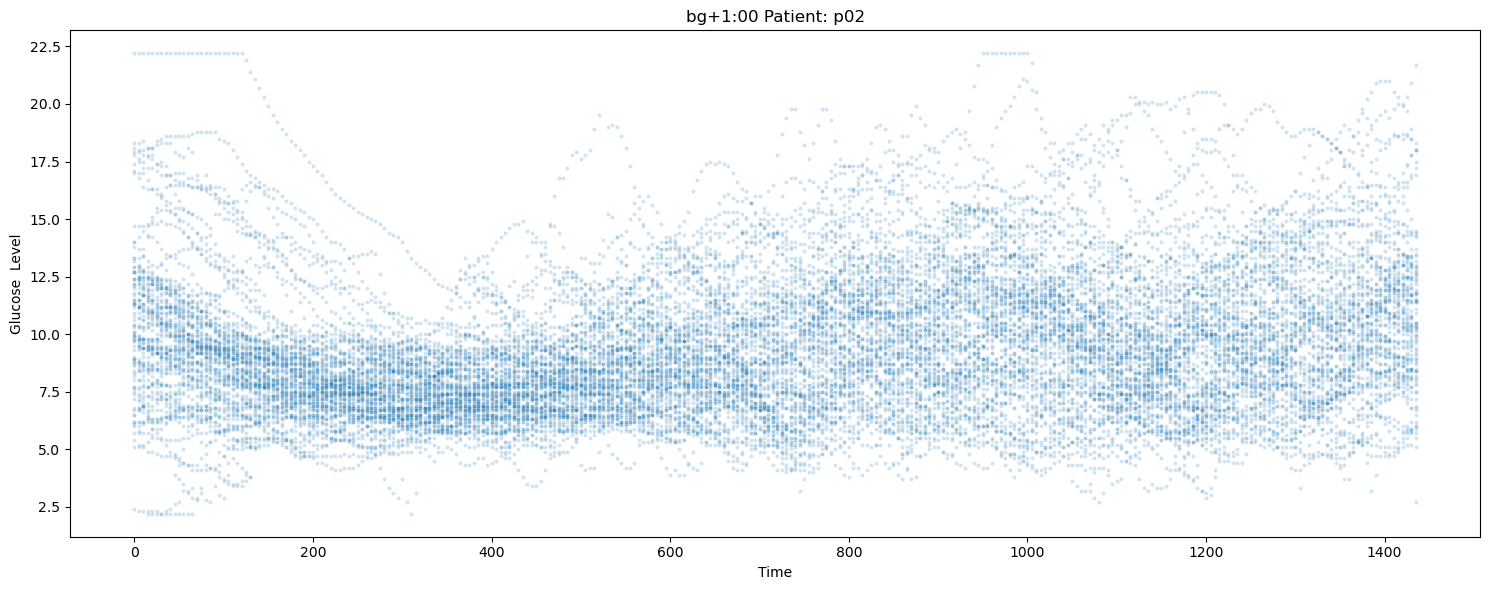

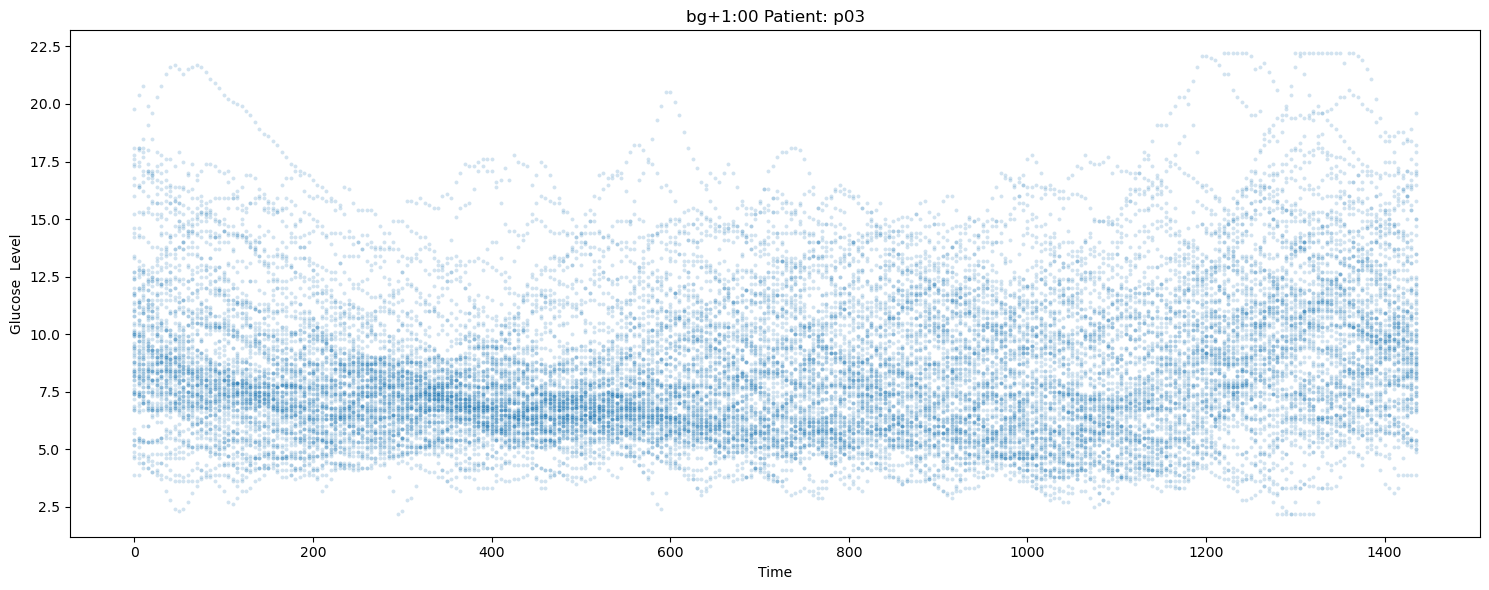

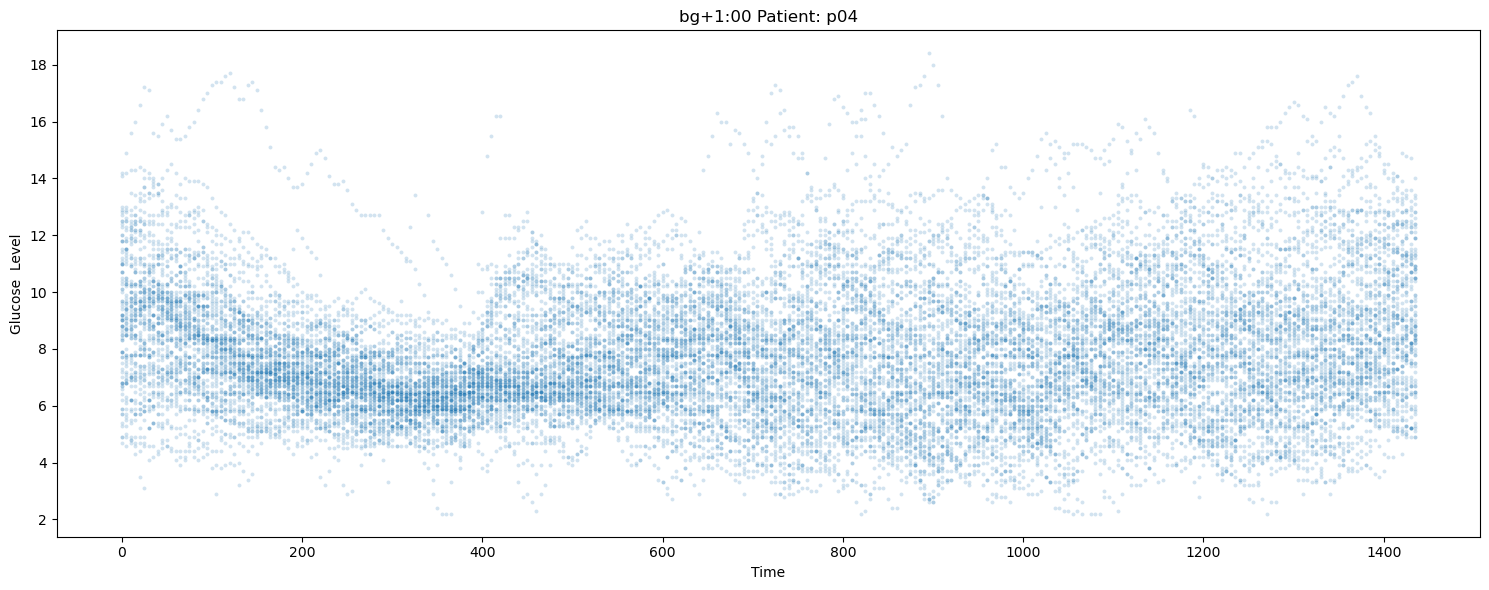

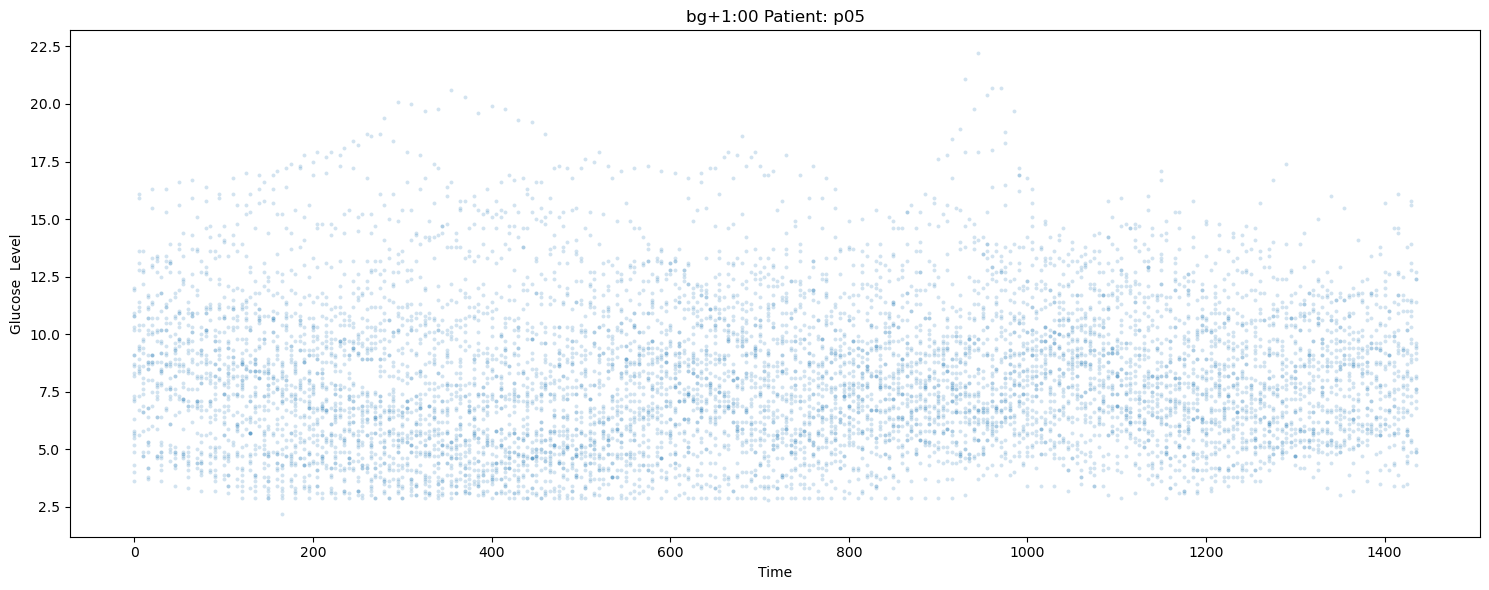

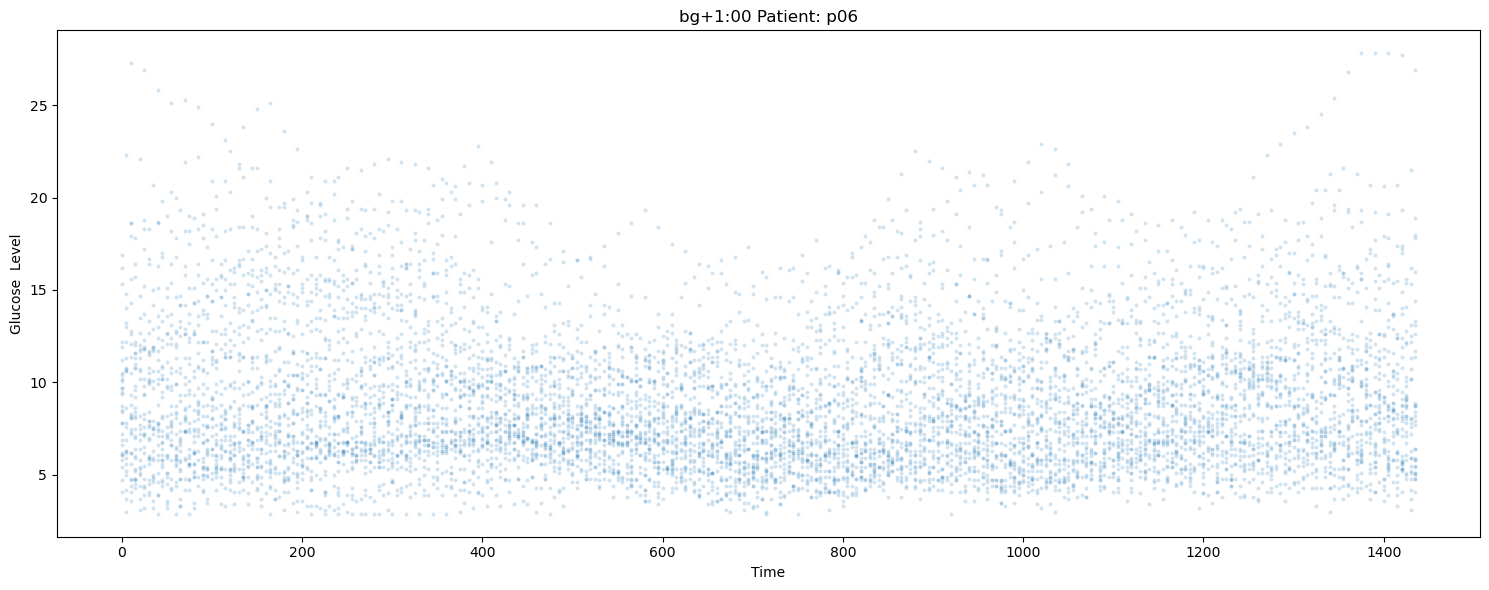

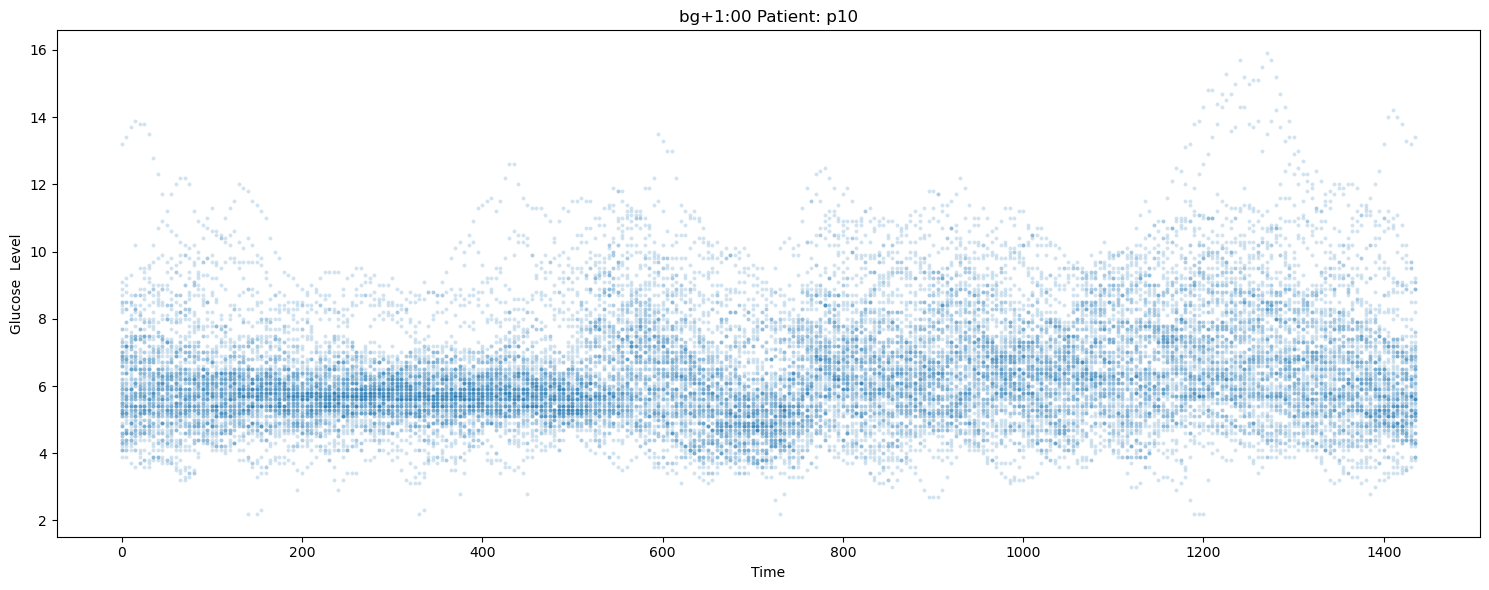

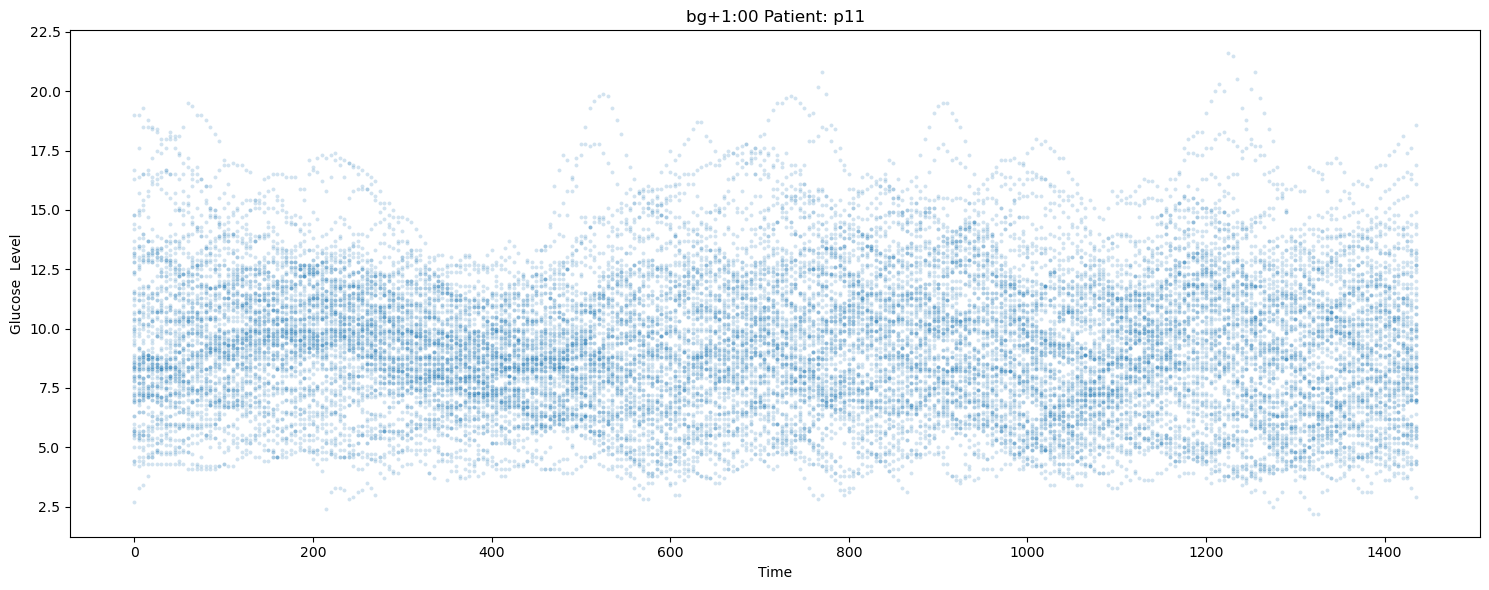

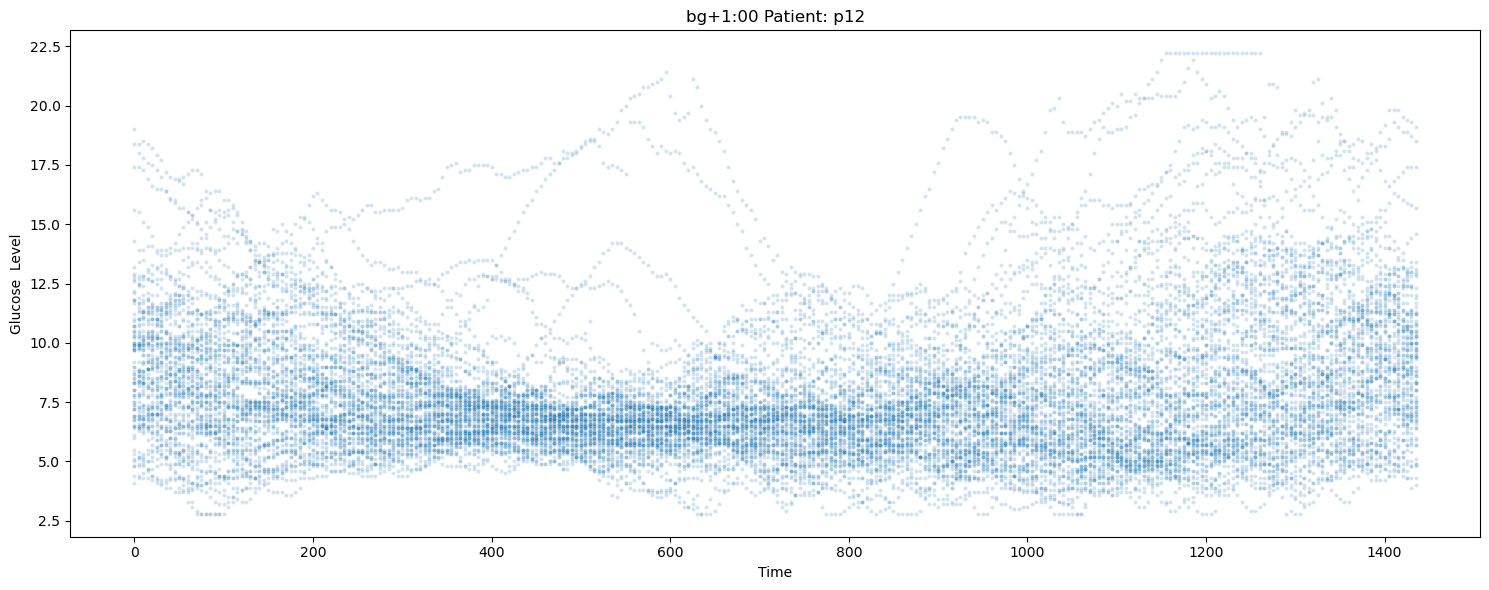

In [51]:
# Evolution of the target variable over time
for p_num in train['p_num'].unique():
    plt.figure(figsize = (15, 6))
    df = train[train['p_num'] == p_num]
    sns.scatterplot(x = 'time_min', y = target, data = df, alpha = 0.2, s = 8)
    plt.title(target + ' Patient: ' + p_num)
    plt.xlabel('Time')
    plt.ylabel('Glucose  Level')
    plt.tight_layout() 
    plt.show()

#### Lineplot

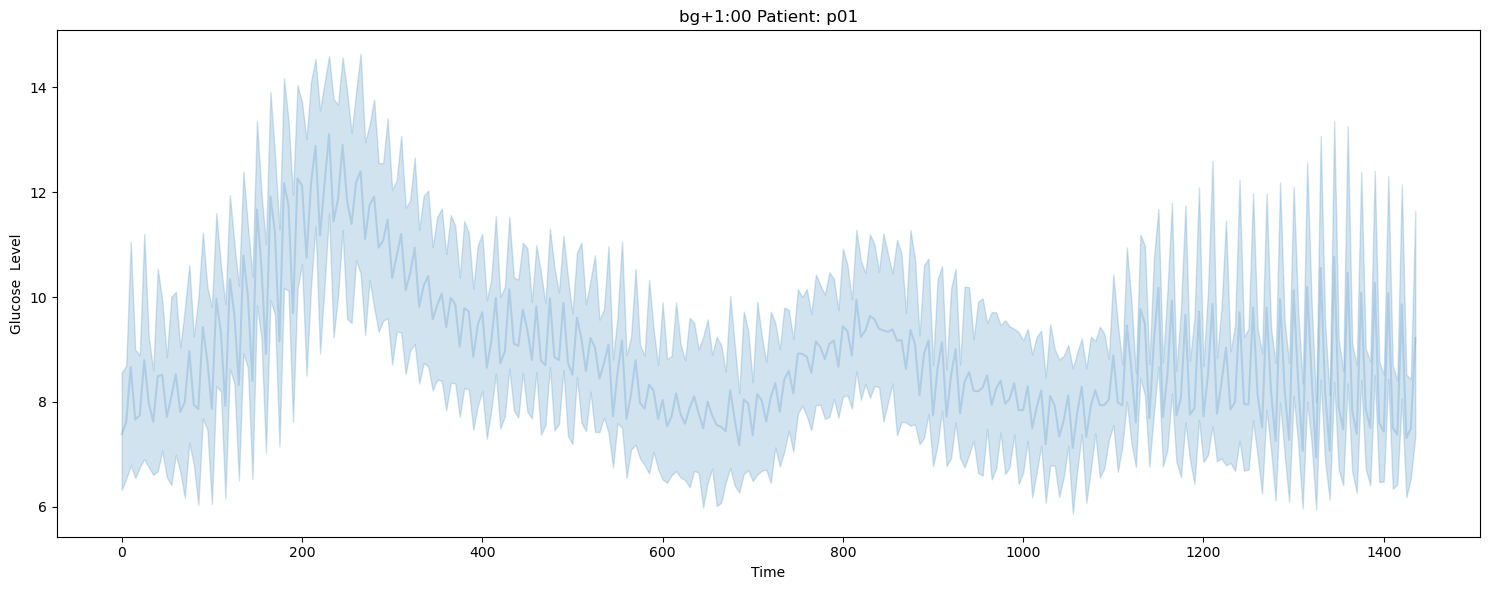

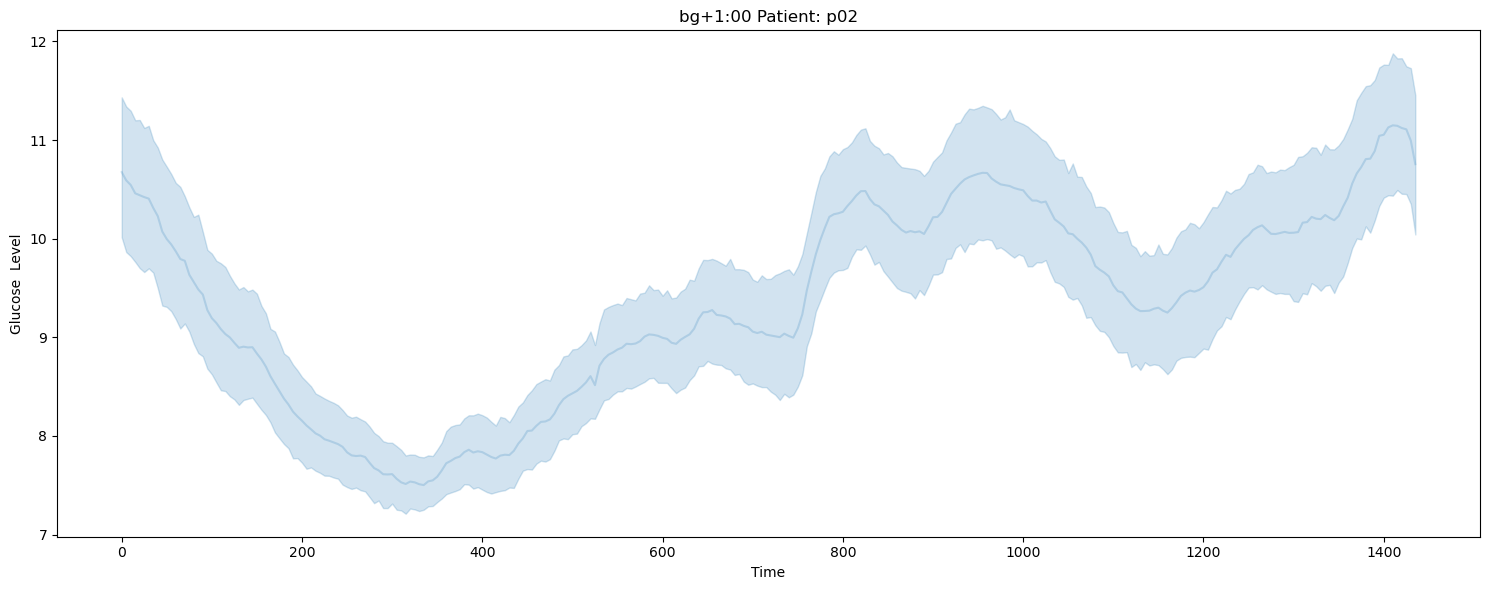

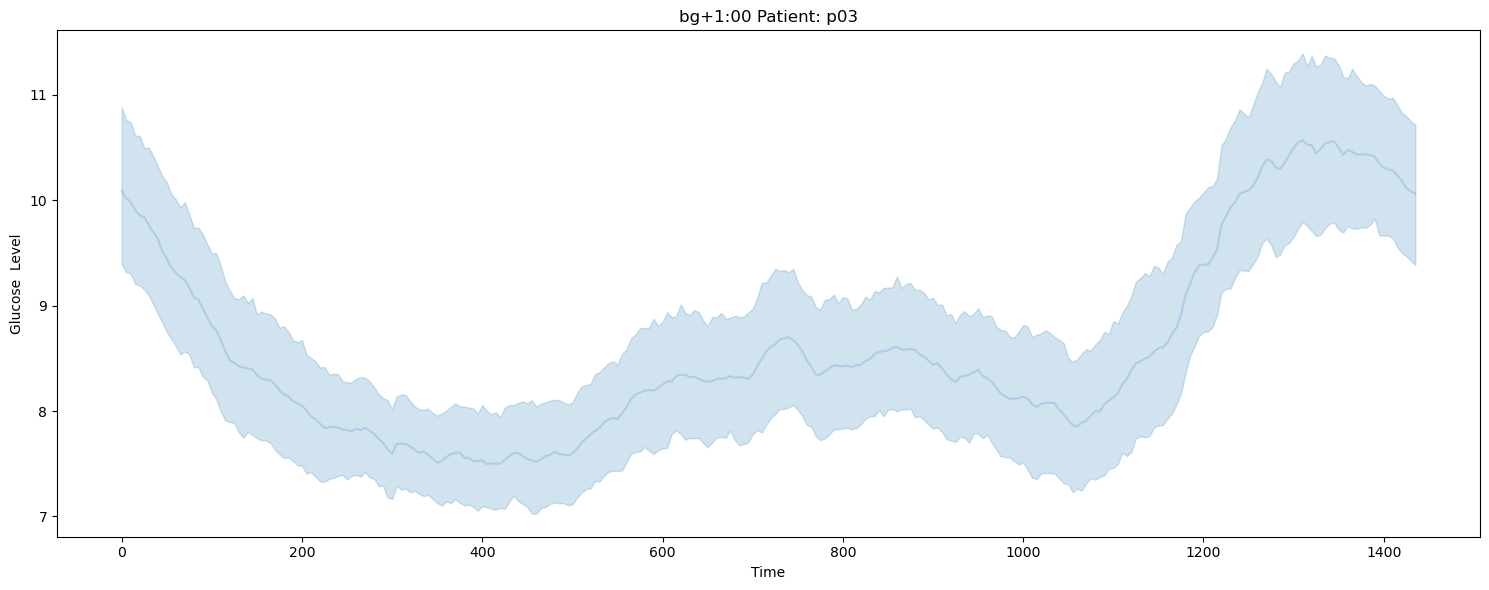

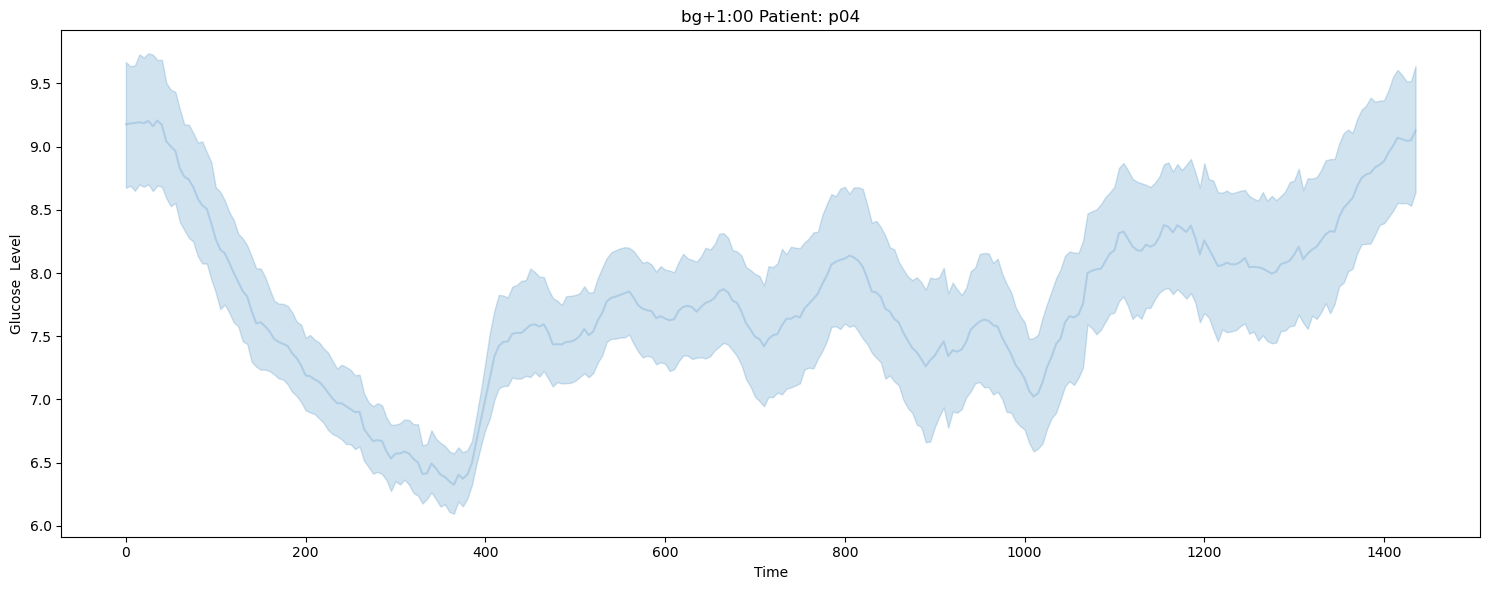

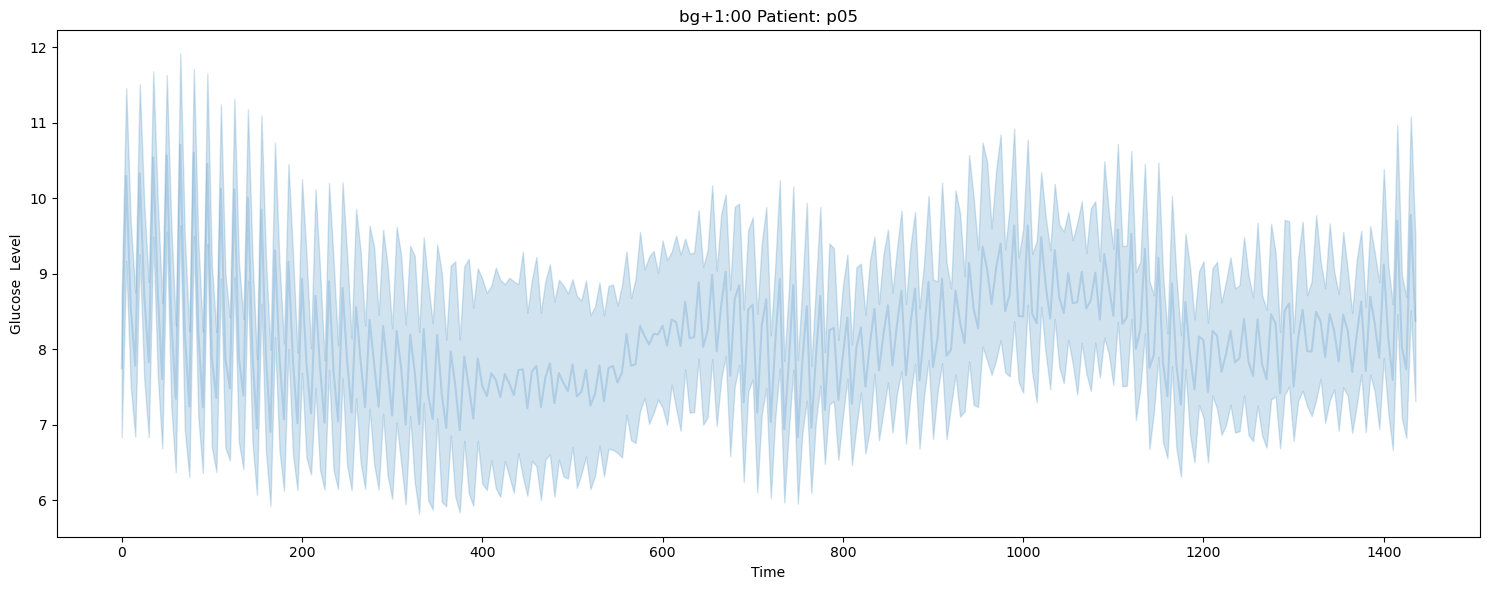

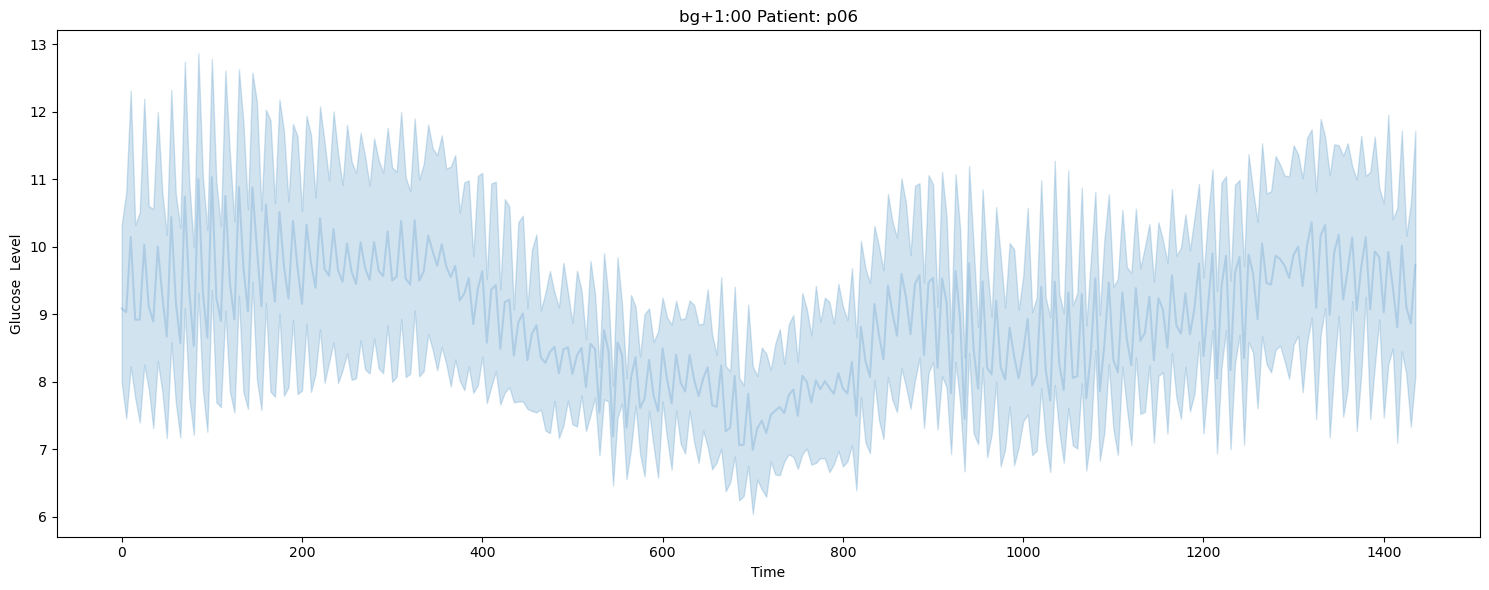

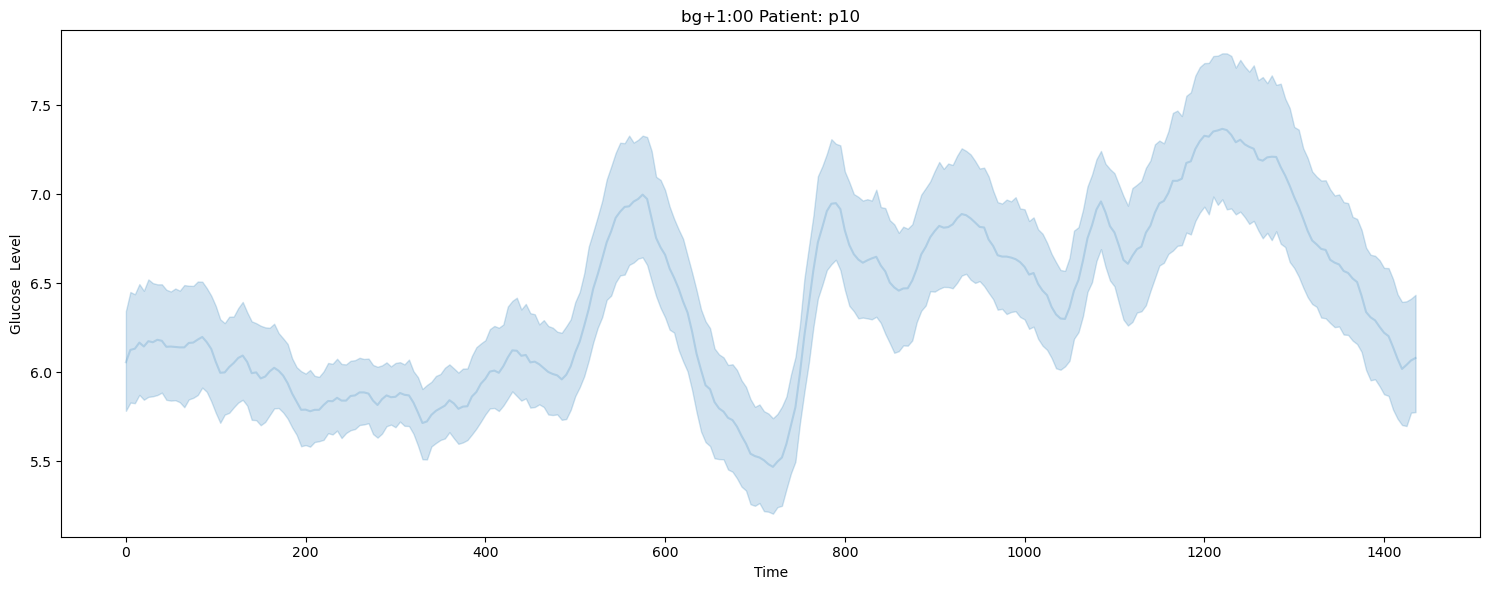

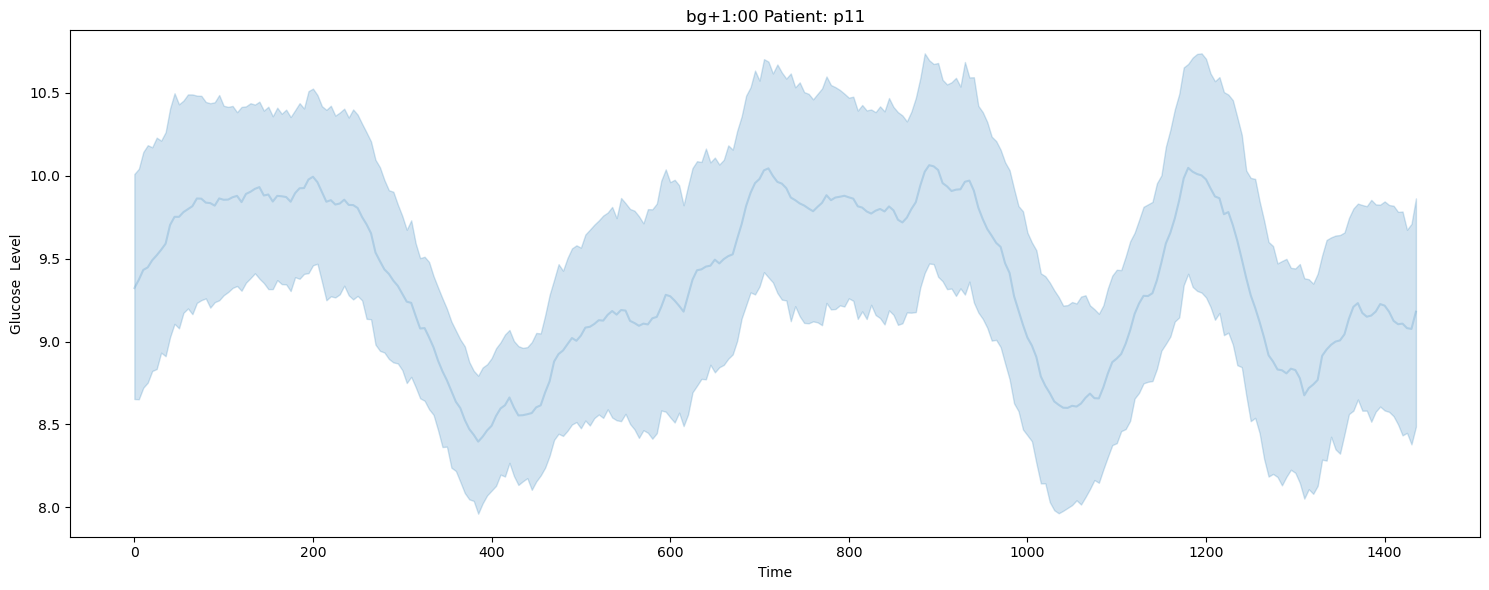

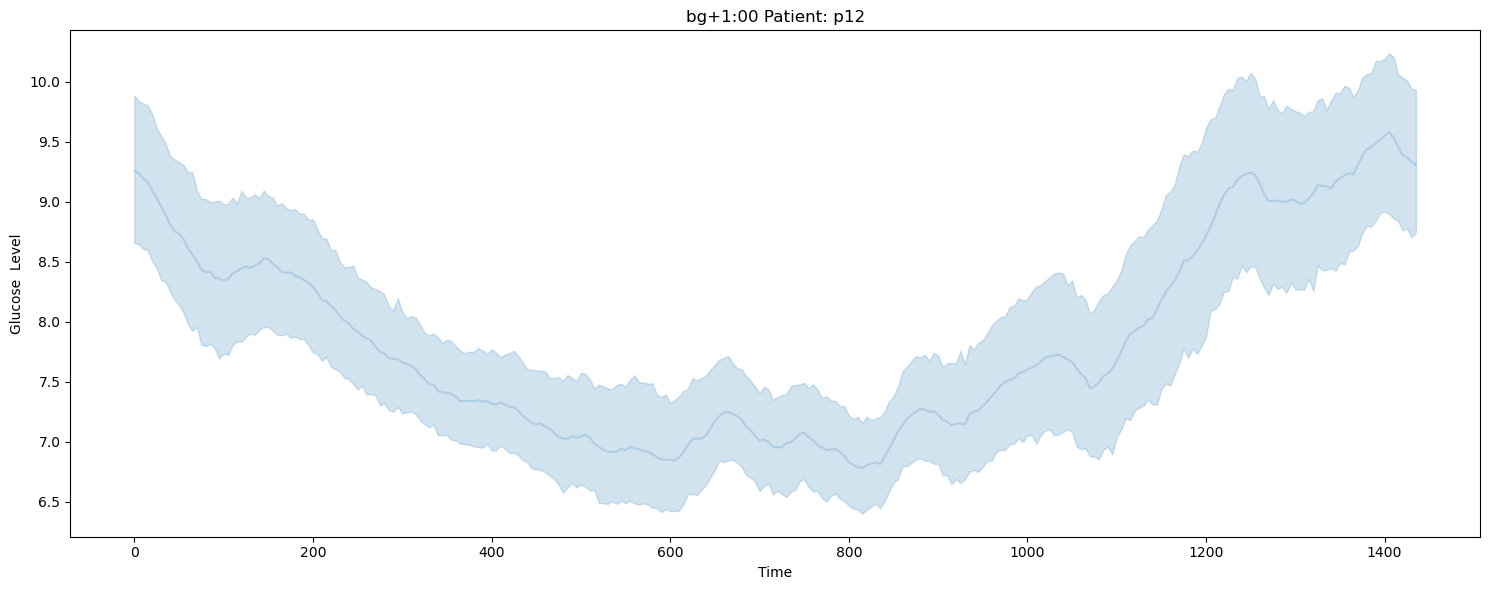

In [53]:
# Evolution of the target variable over time
for p_num in train['p_num'].unique():
    plt.figure(figsize = (15, 6))
    df = train[train['p_num'] == p_num]
    sns.lineplot(x = 'time_min', y = target, data = df, alpha = 0.2)
    plt.title(target + ' Patient: ' + p_num)
    plt.xlabel('Time')
    plt.ylabel('Glucose  Level')
    plt.tight_layout() 
    plt.show()

### Correlations

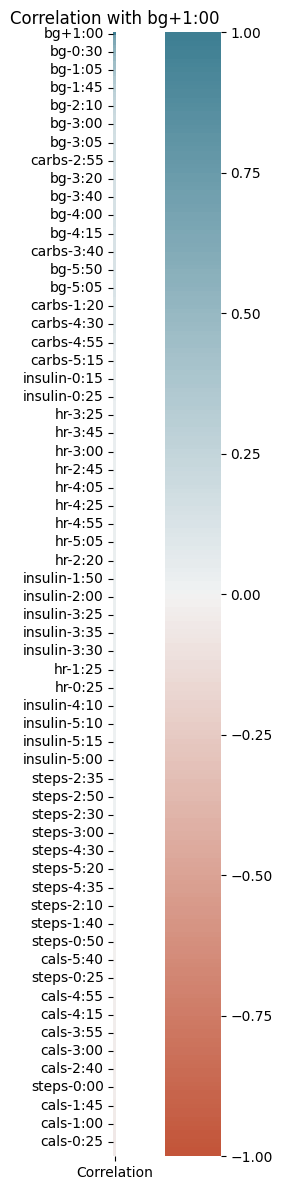

In [14]:
train_corr = train.drop(columns=train.filter(like='activity').columns)
train_corr = train_corr.drop(["id", "p_num", "time"], axis=1)

correlations_with_bg = train_corr.corrwith(train_corr['bg+1:00'])
correlations_with_bg = correlations_with_bg.sort_values(ascending=False)
correlation_df = pd.DataFrame(correlations_with_bg, columns=['Correlation'])

# Create the heatmap
plt.figure(figsize=(10, 12))
axis_corr = sns.heatmap(
    correlation_df,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    fmt='.2f'
)

plt.title("Correlation with bg+1:00")
plt.tight_layout()
plt.show()

## Exploration of the descriptors

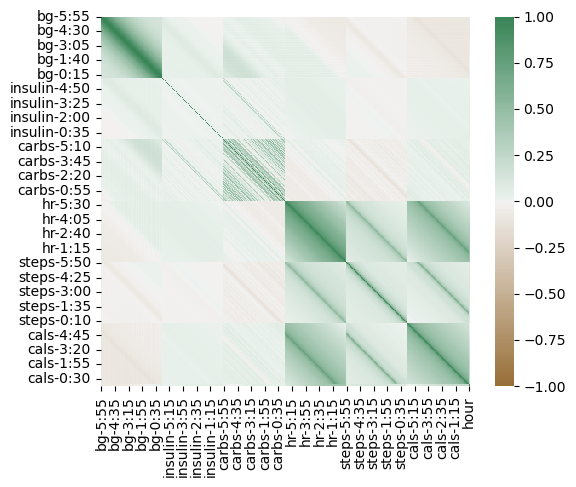

In [9]:
train_corr = train.drop(columns=train.filter(like='activity').columns)
train_corr = train_corr.drop(["id", "p_num", "time", "bg+1:00"], axis = 1)
correlation_train = train_corr.corr()

axis_corr = sns.heatmap(
correlation_train,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

In [10]:
def actual_time(df, col_var):
    df[['hours', 'minutes']] = df[col_var].str.extract('(-?\d+):(\d+)')
    df['time_diff'] = df['hours'].astype(int) * 60 - df['minutes'].astype(int)
    
    # Calculate actual time in minutes for each bg measurement
    df['actual_time'] = df['time_min'] + df['time_diff']
    
    df = df.drop(columns=['hours', 'minutes', 'time_diff'])
    
    return df

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/var/folders/2r/vz71dl552fd4t6lk1z7s6_bh0000gn/T/ipykernel_93672/986835876.py:2: SyntaxWarning: invalid escape sequence '\d'
  df[['hours', 'minutes']] = df[col_var].str.extract('(-?\d+):(\d+)')


In [11]:
p01_df = train[train['p_num'] == 'p01']

### Blood glucose

#### Initial look to the variable

In [12]:
bg_columns = [col for col in train.columns if col.startswith('bg')]
for p_num in train['p_num'].unique():
    df = train[train['p_num'] == p_num]
    df = pd.melt(df, id_vars=['id', 'time_min'], value_vars=bg_columns, var_name='bg_time', value_name='bg_value')
    print(f"Statistics for patient: {p_num}")
    print(df.describe())

Statistics for patient: p01
            time_min       bg_value
count  617507.000000  207821.000000
mean      722.103677       8.921094
std       411.870036       4.148868
min         0.000000       2.200000
25%       365.000000       5.600000
50%       725.000000       8.100000
75%      1080.000000      11.600000
max      1435.000000      27.800000
Statistics for patient: p02
           time_min      bg_value
count  1.888656e+06  1.866016e+06
mean   7.143060e+02  9.326022e+00
std    4.117706e+02  2.925766e+00
min    0.000000e+00  2.200000e+00
25%    3.600000e+02  7.200000e+00
50%    7.150000e+02  8.800000e+00
75%    1.070000e+03  1.090000e+01
max    1.435000e+03  2.220000e+01
Statistics for patient: p03
           time_min      bg_value
count  1.900044e+06  1.881181e+06
mean   7.143269e+02  8.583683e+00
std    4.139445e+02  3.140828e+00
min    0.000000e+00  2.200000e+00
25%    3.600000e+02  6.300000e+00
50%    7.100000e+02  7.900000e+00
75%    1.065000e+03  1.040000e+01
max    1.43500

#### For patient 1

Visualize for patient 1

In [13]:
p01_bg = pd.melt(p01_df, id_vars=['id', 'time_min'], value_vars=bg_columns, var_name='bg_time', value_name='bg_value')

p01_bg[['p_num', 'session']] = p01_bg['id'].str.split('_', expand=True)
p01_bg = actual_time(p01_bg, 'bg_time')
    
p01_bg.head()

id  time_min  bg_time  bg_value p_num session  actual_time
0  p01_0       370  bg-5:55       NaN   p01       0           15
1  p01_1       385  bg-5:55       NaN   p01       1           30
2  p01_2       400  bg-5:55       NaN   p01       2           45
3  p01_3       415  bg-5:55       NaN   p01       3           60
4  p01_4       430  bg-5:55       NaN   p01       4           75

#### Evolution over time

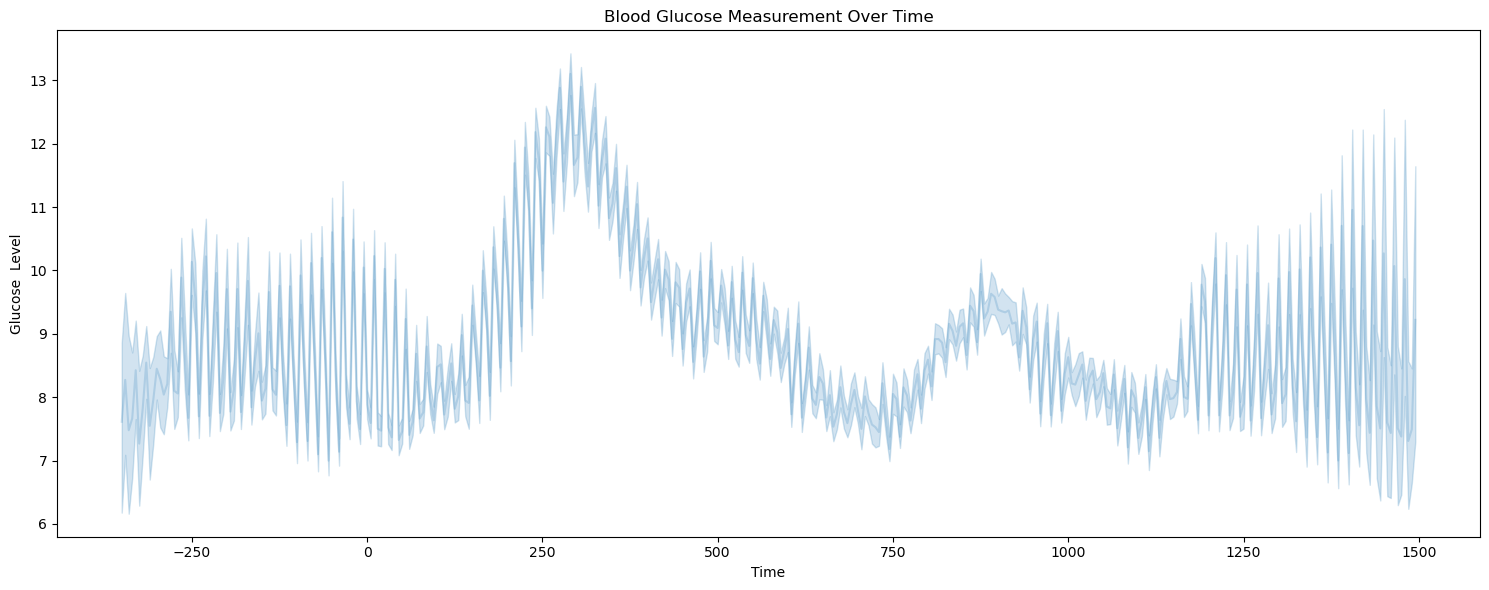

In [14]:
plt.figure(figsize=(15, 6))

sns.lineplot(x='actual_time', y='bg_value', data=p01_bg, alpha = 0.2)
    
plt.title('Blood Glucose Measurement Over Time')
plt.xlabel('Time')
plt.ylabel('Glucose  Level')

plt.tight_layout() 
plt.show()

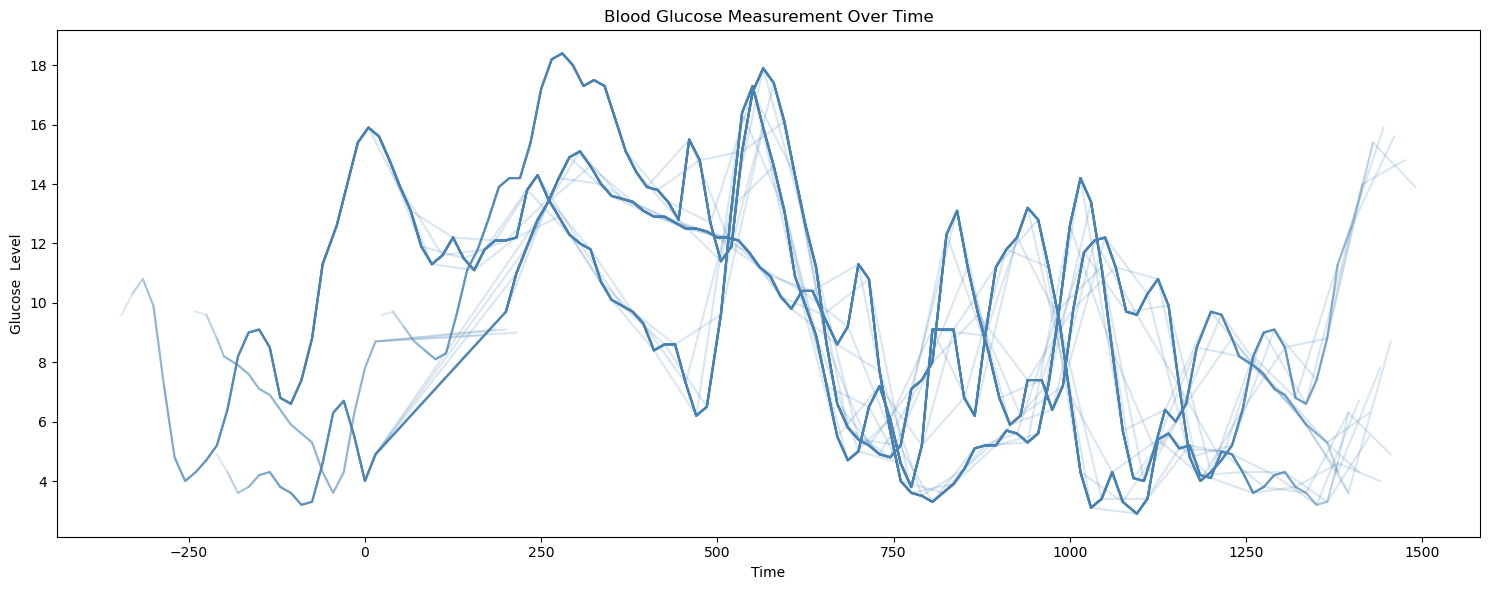

In [20]:
plt.figure(figsize=(15, 6))
for session in p01_bg['session'].unique()[0:251]:
    df = p01_bg[p01_bg['session'] == str(session)]
    sns.lineplot(x='actual_time', y='bg_value', data=df, alpha = 0.2, color = 'steelblue')
    
plt.title('Blood Glucose Measurement Over Time')
plt.xlabel('Time')
plt.ylabel('Glucose  Level')

plt.tight_layout() 
plt.show()

### Insulin

In [21]:
ins_columns = [col for col in p01_df.columns if col.startswith('insulin')]

In [22]:
for p_num in train['p_num'].unique():
    df = train[train['p_num'] == p_num]
    df = pd.melt(df, id_vars=['id', 'time_min'], value_vars=ins_columns, var_name='ins_time', value_name='ins_value')
    print(f"Statistics for patient: {p_num}")
    print(df.describe())

Statistics for patient: p01
            time_min      ins_value
count  609048.000000  609048.000000
mean      722.103677       0.133160
std       411.870041       0.707594
min         0.000000       0.000000
25%       365.000000       0.029200
50%       725.000000       0.041700
75%      1080.000000       0.058300
max      1435.000000      11.741700
Statistics for patient: p02
           time_min     ins_value
count  1.862784e+06  1.862784e+06
mean   7.143060e+02  1.792409e-01
std    4.117706e+02  6.866953e-01
min    0.000000e+00  0.000000e+00
25%    3.600000e+02  5.000000e-02
50%    7.150000e+02  7.930000e-02
75%    1.070000e+03  1.000000e-01
max    1.435000e+03  1.808330e+01
Statistics for patient: p03
           time_min     ins_value
count  1.874016e+06  1.874016e+06
mean   7.143269e+02  2.699891e-01
std    4.139445e+02  1.191297e+00
min    0.000000e+00  0.000000e+00
25%    3.600000e+02  8.330000e-02
50%    7.100000e+02  1.308000e-01
75%    1.065000e+03  1.917000e-01
max    1.43500

In [23]:
p01_ins = pd.melt(p01_df, id_vars=['id', 'time_min'], value_vars=ins_columns, var_name='ins_time', value_name='ins_value')

p01_ins[['p_num', 'session']] = p01_ins['id'].str.split('_', expand=True)

p01_ins = actual_time(p01_ins, 'ins_time')

p01_ins.head()

id  time_min      ins_time  ins_value p_num session  actual_time
0  p01_0       370  insulin-5:55     0.0083   p01       0           15
1  p01_1       385  insulin-5:55     0.0083   p01       1           30
2  p01_2       400  insulin-5:55     0.0083   p01       2           45
3  p01_3       415  insulin-5:55     0.0083   p01       3           60
4  p01_4       430  insulin-5:55     0.0083   p01       4           75

#### Evolution over time

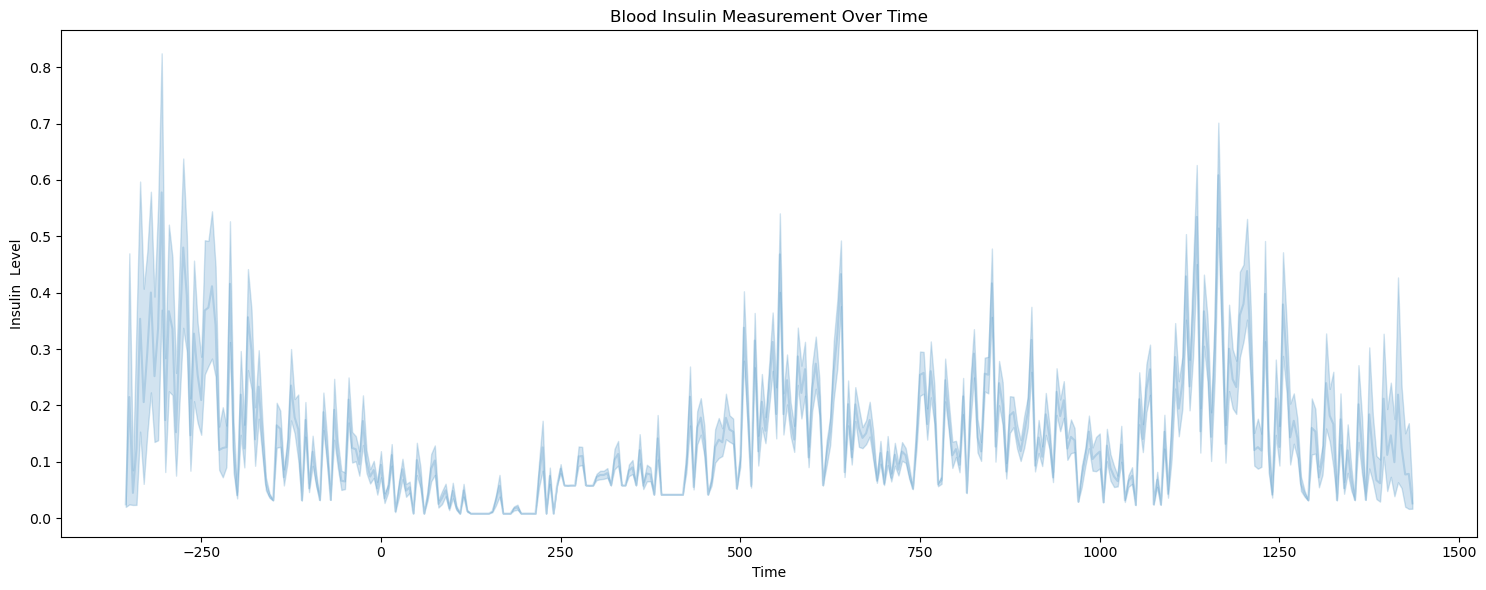

In [24]:
plt.figure(figsize=(15, 6))

sns.lineplot(x='actual_time', y='ins_value', data=p01_ins, alpha = 0.2)
    
plt.title('Blood Insulin Measurement Over Time')
plt.xlabel('Time')
plt.ylabel('Insulin  Level')

plt.tight_layout() 
plt.show()

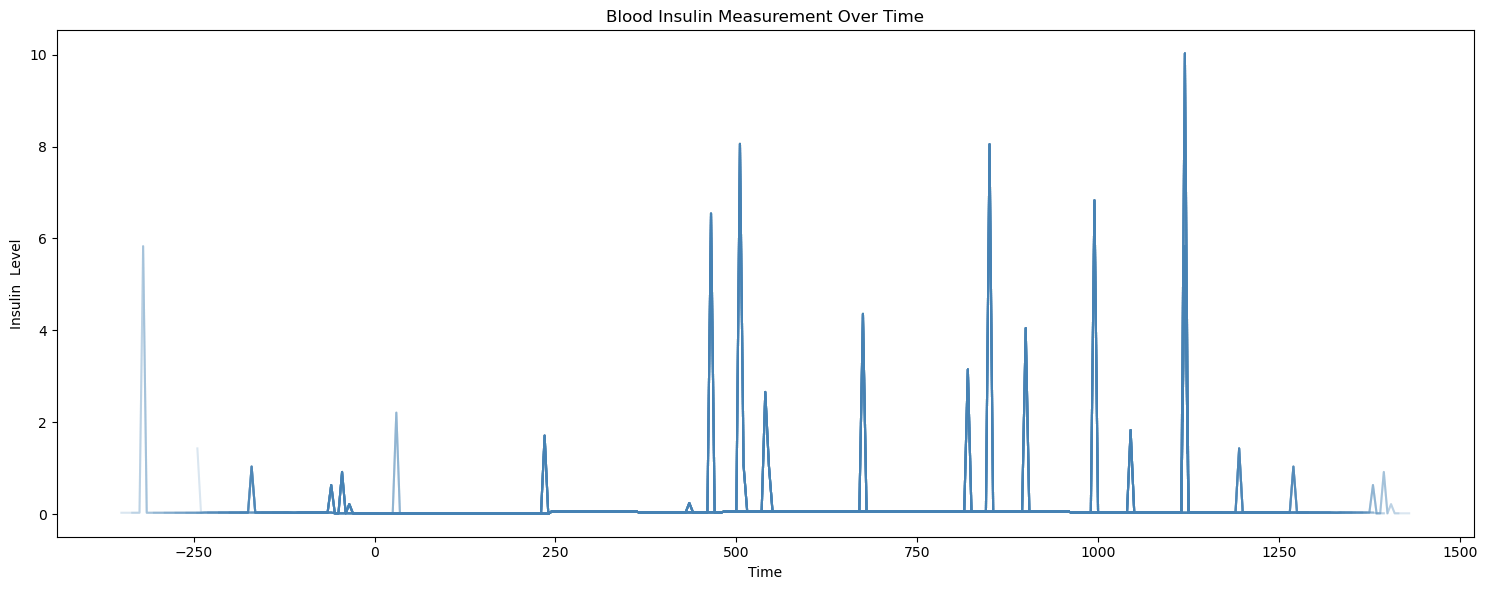

In [26]:
plt.figure(figsize=(15, 6))
for session in p01_ins['session'].unique()[0:251]:
    df = p01_ins[p01_ins['session'] == str(session)]
    sns.lineplot(x='actual_time', y='ins_value', data=df, alpha = 0.2, color = 'steelblue')
    
plt.title('Blood Insulin Measurement Over Time')
plt.xlabel('Time')
plt.ylabel('Insulin  Level')

plt.tight_layout() 
plt.show()

### Carbs

In [27]:
carbs_columns = [col for col in p01_df.columns if col.startswith('carbs')]
for p_num in train['p_num'].unique():
    df = train[train['p_num'] == p_num]
    df = pd.melt(df, id_vars=['id', 'time_min'], value_vars=carbs_columns, var_name='carbs_time', value_name='carbs_value')
    print(f"Statistics for patient: {p_num}")
    print(df.describe())

Statistics for patient: p01
            time_min  carbs_value
count  609048.000000  9900.000000
mean      722.103677    26.119293
std       411.870041    13.804994
min         0.000000     4.000000
25%       365.000000    15.000000
50%       725.000000    23.000000
75%      1080.000000    34.000000
max      1435.000000   110.000000
Statistics for patient: p02
           time_min   carbs_value
count  1.862784e+06  23542.000000
mean   7.143060e+02     53.130405
std    4.117706e+02     42.707654
min    0.000000e+00     10.000000
25%    3.600000e+02     30.000000
50%    7.150000e+02     50.000000
75%    1.070000e+03     60.000000
max    1.435000e+03    660.000000
Statistics for patient: p03
           time_min   carbs_value
count  1.874016e+06  22364.000000
mean   7.143269e+02     81.568637
std    4.139445e+02     63.654144
min    0.000000e+00     20.000000
25%    3.600000e+02     60.000000
50%    7.100000e+02     80.000000
75%    1.065000e+03     90.000000
max    1.435000e+03    852.00000

In [28]:
p01_carbs = pd.melt(p01_df, id_vars=['id', 'time_min'], value_vars=carbs_columns, var_name='carbs_time', value_name='carbs_value')

p01_carbs[['p_num', 'session']] = p01_carbs['id'].str.split('_', expand=True)

p01_carbs = actual_time(p01_carbs, 'carbs_time')

p01_carbs.head()

id  time_min  carbs_time  carbs_value p_num session  actual_time
0  p01_0       370  carbs-5:55          NaN   p01       0           15
1  p01_1       385  carbs-5:55          NaN   p01       1           30
2  p01_2       400  carbs-5:55          NaN   p01       2           45
3  p01_3       415  carbs-5:55          NaN   p01       3           60
4  p01_4       430  carbs-5:55          NaN   p01       4           75

#### Evolution over time

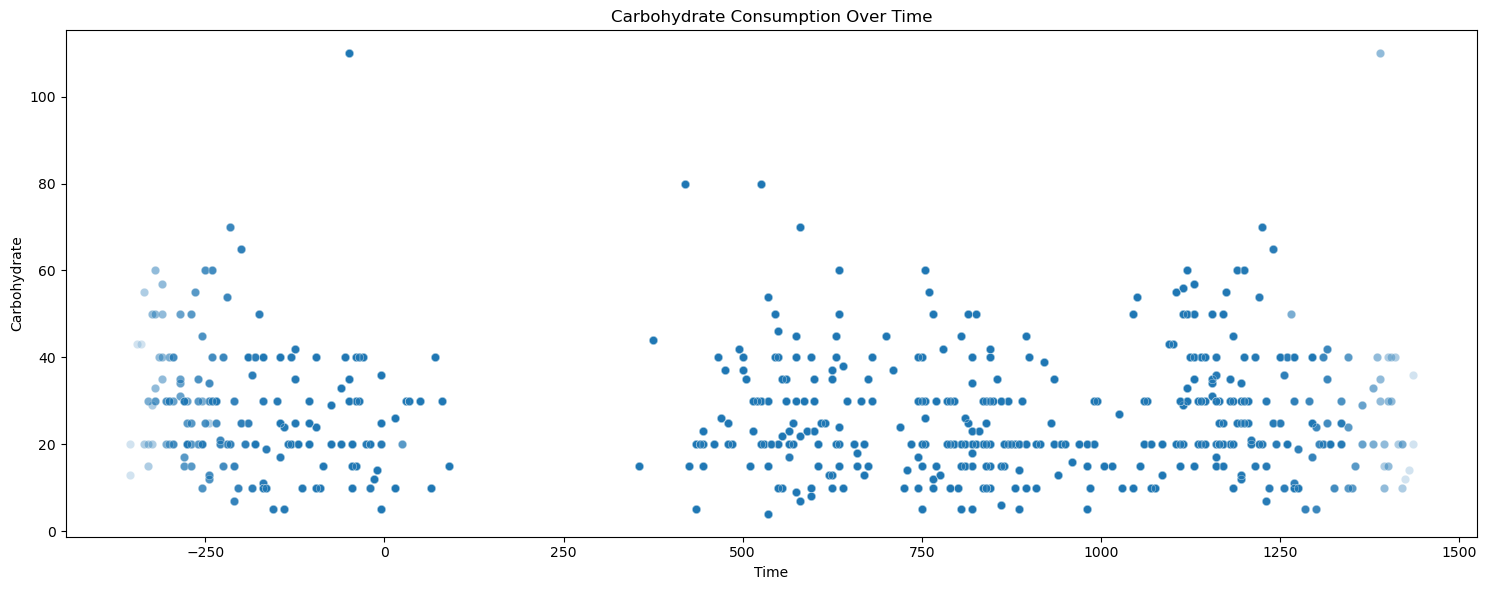

In [31]:
plt.figure(figsize=(15, 6))

sns.scatterplot(x='actual_time', y='carbs_value', data=p01_carbs, alpha = 0.2)
    
plt.title('Carbohydrate Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Carbohydrate')

plt.tight_layout() 
plt.show()

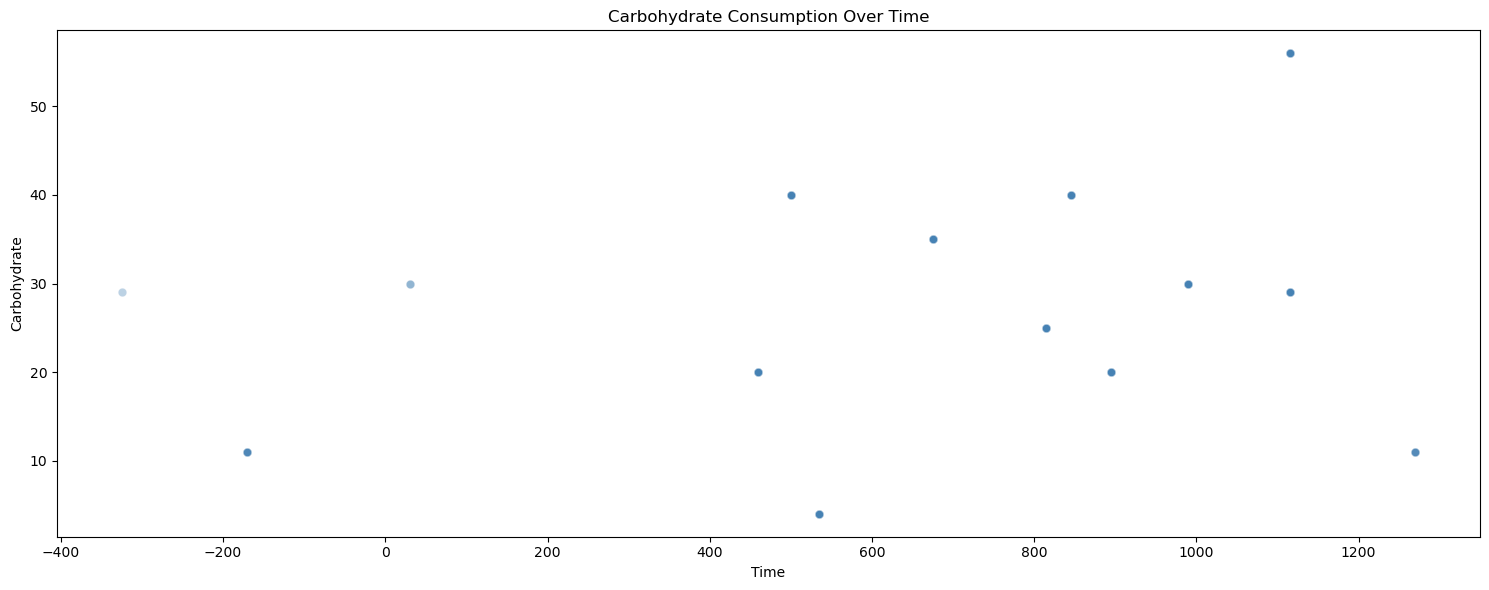

In [33]:
plt.figure(figsize=(15, 6))
for session in p01_carbs['session'].unique()[0:251]:
    df = p01_carbs[p01_carbs['session'] == str(session)]
    sns.scatterplot(x='actual_time', y='carbs_value', data=df, alpha = 0.2, color = 'steelblue')
    
plt.title('Carbohydrate Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Carbohydrate')

plt.tight_layout() 
plt.show()

### Heart rate

In [34]:
hr_columns = [col for col in p01_df.columns if col.startswith('hr')]
for p_num in train['p_num'].unique():
    df = train[train['p_num'] == p_num]
    df = pd.melt(df, id_vars=['id', 'time_min'], value_vars=hr_columns, var_name='hr_time', value_name='hr_value')
    print(f"Statistics for patient: {p_num}")
    print(df.describe())

Statistics for patient: p01
            time_min       hr_value
count  609048.000000  576359.000000
mean      722.103677      77.199807
std       411.870041      16.651391
min         0.000000      46.600000
25%       365.000000      62.600000
50%       725.000000      75.900000
75%      1080.000000      88.100000
max      1435.000000     172.400000
Statistics for patient: p02
           time_min       hr_value
count  1.862784e+06  398608.000000
mean   7.143060e+02      83.379988
std    4.117706e+02      17.959396
min    0.000000e+00      40.000000
25%    3.600000e+02      70.000000
50%    7.150000e+02      80.000000
75%    1.070000e+03      93.400000
max    1.435000e+03     185.300000
Statistics for patient: p03
           time_min      hr_value
count  1.874016e+06  1.677813e+06
mean   7.143269e+02  7.578578e+01
std    4.139445e+02  1.678142e+01
min    0.000000e+00  4.720000e+01
25%    3.600000e+02  6.300000e+01
50%    7.100000e+02  7.360000e+01
75%    1.065000e+03  8.390000e+01
max  

In [35]:
p01_hr = pd.melt(p01_df, id_vars=['id', 'time_min'], value_vars=hr_columns, var_name='hr_time', value_name='hr_value')

p01_hr[['p_num', 'session']] = p01_hr['id'].str.split('_', expand=True)

p01_hr = actual_time(p01_hr, 'hr_time')

p01_hr.head()

id  time_min  hr_time  hr_value p_num session  actual_time
0  p01_0       370  hr-5:55       NaN   p01       0           15
1  p01_1       385  hr-5:55       NaN   p01       1           30
2  p01_2       400  hr-5:55       NaN   p01       2           45
3  p01_3       415  hr-5:55       NaN   p01       3           60
4  p01_4       430  hr-5:55       NaN   p01       4           75

#### Evolution over time

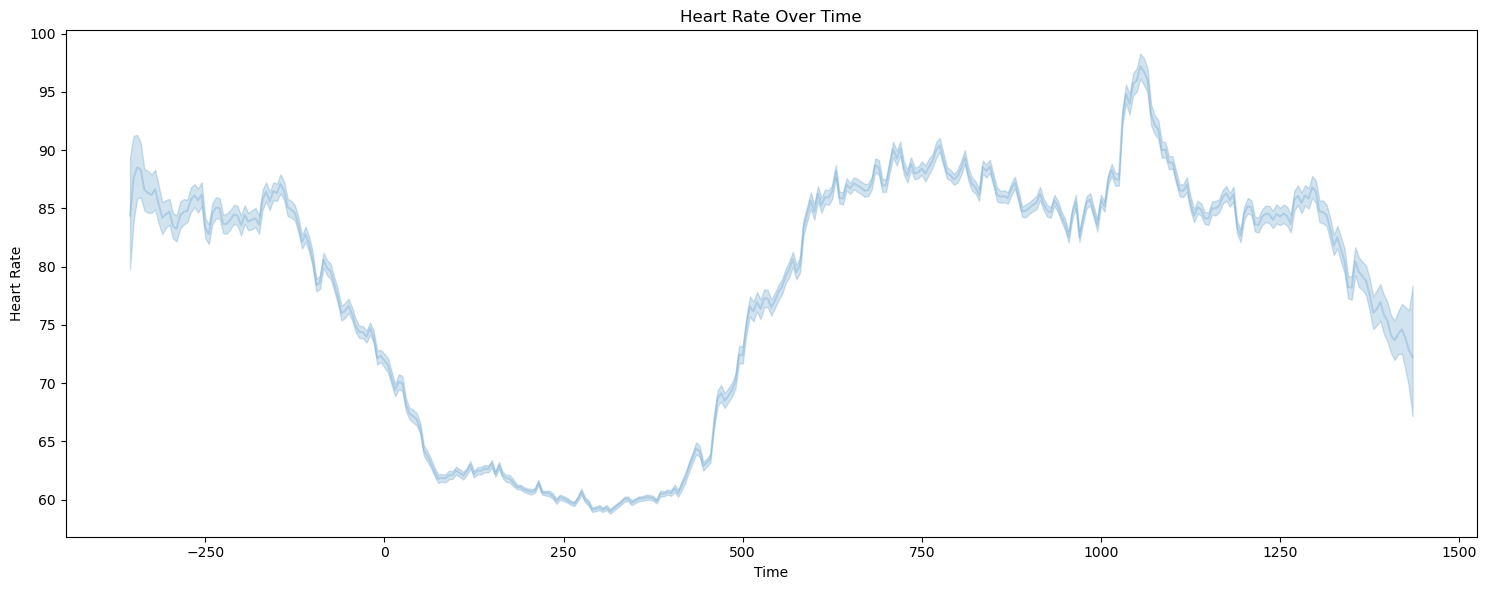

In [37]:
plt.figure(figsize=(15, 6))

sns.lineplot(x='actual_time', y='hr_value', data=p01_hr, alpha = 0.2)
    
plt.title('Heart Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Heart Rate')

plt.tight_layout() 
plt.show()

In the first 250 sessions there are no heart rate measurements

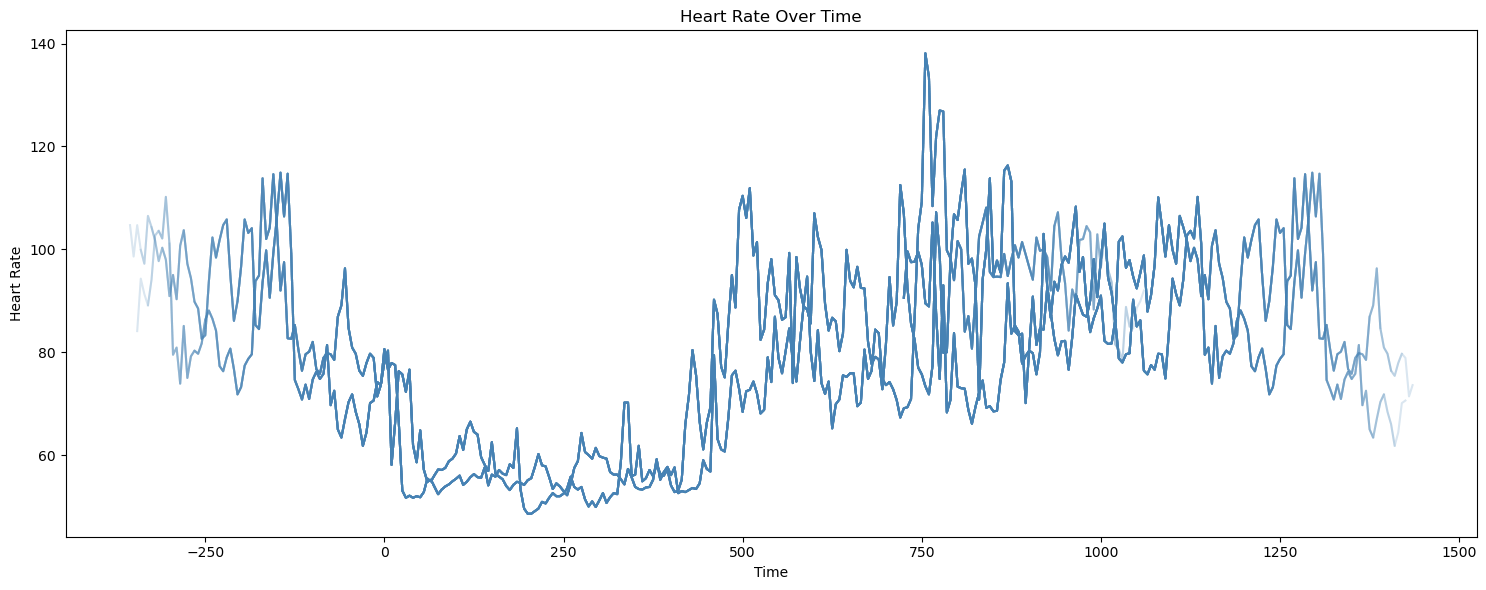

In [41]:
plt.figure(figsize=(15, 6))
for session in p01_hr['session'].unique()[0:501]:
    df = p01_hr[p01_hr['session'] == str(session)]
    sns.lineplot(x='actual_time', y='hr_value', data=df, alpha = 0.2, color = 'steelblue')
    
plt.title('Heart Rate Over Time')
plt.xlabel('Time')
plt.ylabel('Heart Rate')

plt.tight_layout() 
plt.show()

### Calories

In [42]:
cals_columns = [col for col in p01_df.columns if col.startswith('cals')]
for p_num in train['p_num'].unique():
    df = train[train['p_num'] == p_num]
    df = pd.melt(df, id_vars=['id', 'time_min'], value_vars=cals_columns, var_name='cals_time', value_name='cals_value')
    print(f"Statistics for patient: {p_num}")
    print(df.describe())

Statistics for patient: p01
            time_min     cals_value
count  609048.000000  602796.000000
mean      722.103677       9.048902
std       411.870041       6.593285
min         0.000000       0.960000
25%       365.000000       4.800000
50%       725.000000       5.580000
75%      1080.000000      11.060000
max      1435.000000      53.000000
Statistics for patient: p02
           time_min     cals_value
count  1.862784e+06  534177.000000
mean   7.143060e+02       4.686494
std    4.117706e+02       6.936414
min    0.000000e+00       0.030000
25%    3.600000e+02       1.660000
50%    7.150000e+02       2.990000
75%    1.070000e+03       5.410000
max    1.435000e+03     116.100000
Statistics for patient: p03
           time_min    cals_value
count  1.874016e+06  1.772172e+06
mean   7.143269e+02  8.415718e+00
std    4.139445e+02  7.006396e+00
min    0.000000e+00  1.120000e+00
25%    3.600000e+02  5.600000e+00
50%    7.100000e+02  5.840000e+00
75%    1.065000e+03  7.300000e+00
max  

In [43]:
p01_cals = pd.melt(p01_df, id_vars=['id', 'time_min'], value_vars=cals_columns, var_name='cals_time', value_name='cals_value')

p01_cals[['p_num', 'session']] = p01_cals['id'].str.split('_', expand=True)

p01_cals = actual_time(p01_cals, 'cals_time')

p01_cals.head()

id  time_min  cals_time  cals_value p_num session  actual_time
0  p01_0       370  cals-5:55         NaN   p01       0           15
1  p01_1       385  cals-5:55         NaN   p01       1           30
2  p01_2       400  cals-5:55         NaN   p01       2           45
3  p01_3       415  cals-5:55         NaN   p01       3           60
4  p01_4       430  cals-5:55         NaN   p01       4           75

#### Evolution over time

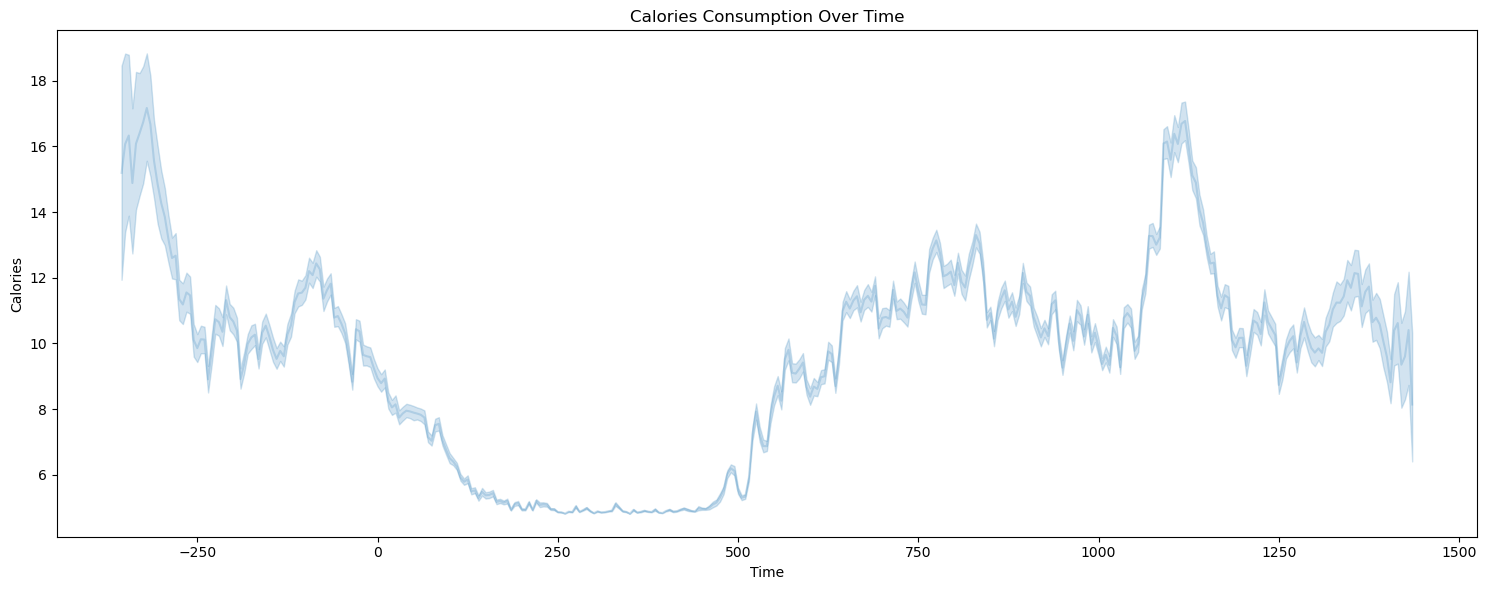

In [44]:
plt.figure(figsize=(15, 6))

sns.lineplot(x='actual_time', y='cals_value', data=p01_cals, alpha = 0.2)
    
plt.title('Calories Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Calories')

plt.tight_layout() 
plt.show()

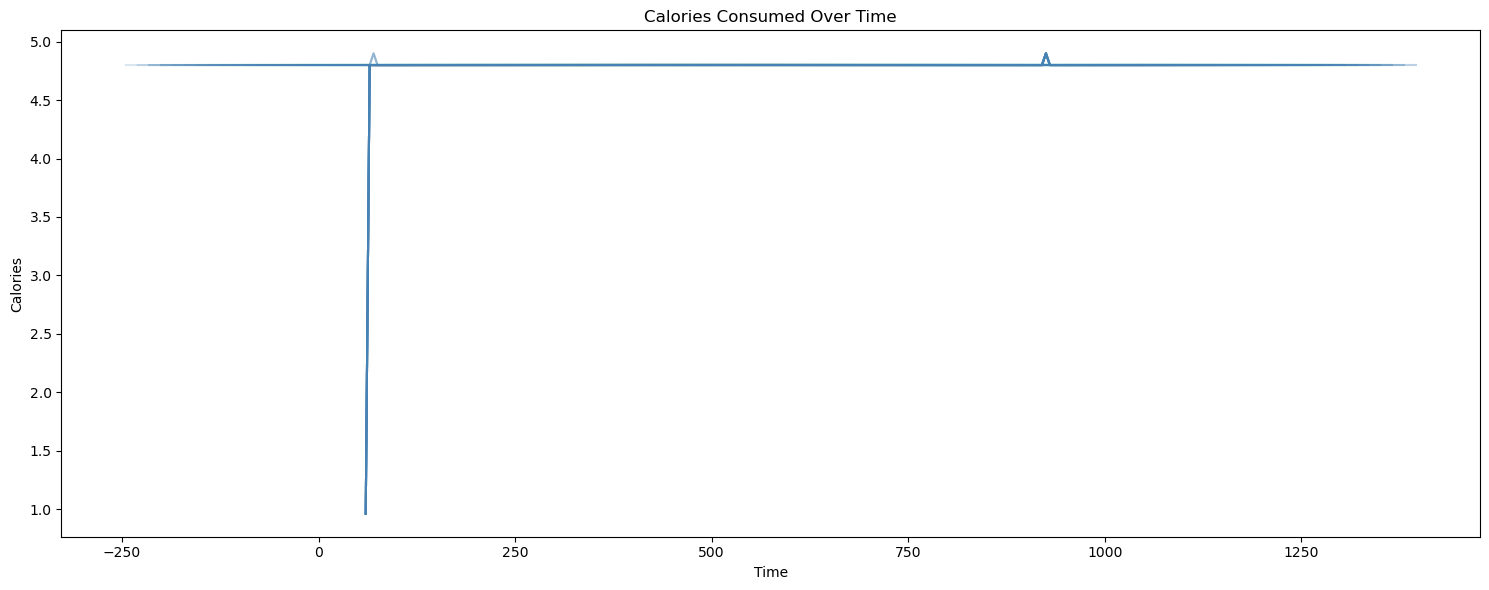

In [47]:
plt.figure(figsize=(15, 6))
for session in p01_cals['session'].unique()[0:251]:
    df = p01_cals[p01_cals['session'] == str(session)]
    sns.lineplot(x='actual_time', y='cals_value', data=df, alpha = 0.2, color = 'steelblue')
    
plt.title('Calories Consumed Over Time')
plt.xlabel('Time')
plt.ylabel('Calories')

plt.tight_layout() 
plt.show()

### Steps

In [49]:
steps_columns = [col for col in p01_df.columns if col.startswith('steps')]
for p_num in train['p_num'].unique():
    df = train[train['p_num'] == p_num]
    df = pd.melt(df, id_vars=['id', 'time_min'], value_vars=steps_columns, var_name='steps_time', value_name='steps_value')
    print(f"Statistics for patient: {p_num}")
    print(df.describe())

Statistics for patient: p01
            time_min    steps_value
count  609048.000000  422643.000000
mean      722.103677      76.143587
std       411.870041     131.112824
min         0.000000       0.000000
25%       365.000000       0.000000
50%       725.000000      18.000000
75%      1080.000000      87.000000
max      1435.000000     766.000000
Statistics for patient: p02
           time_min    steps_value
count  1.862784e+06  296616.000000
mean   7.143060e+02     132.422149
std    4.117706e+02     179.060282
min    0.000000e+00       1.000000
25%    3.600000e+02      31.000000
50%    7.150000e+02      75.000000
75%    1.070000e+03     155.000000
max    1.435000e+03    1359.000000
Statistics for patient: p03
           time_min   steps_value
count  1.874016e+06  1.091652e+06
mean   7.143269e+02  2.162416e+01
std    4.139445e+02  6.551556e+01
min    0.000000e+00  0.000000e+00
25%    3.600000e+02  0.000000e+00
50%    7.100000e+02  0.000000e+00
75%    1.065000e+03  1.200000e+01
max  

In [51]:
p01_steps = pd.melt(p01_df, id_vars=['id', 'time_min'], value_vars=steps_columns, var_name='steps_time', value_name='steps_value')

p01_steps[['p_num', 'session']] = p01_steps['id'].str.split('_', expand=True)

p01_steps = actual_time(p01_steps, 'steps_time')

p01_steps.head()

id  time_min  steps_time  steps_value p_num session  actual_time
0  p01_0       370  steps-5:55          NaN   p01       0           15
1  p01_1       385  steps-5:55          NaN   p01       1           30
2  p01_2       400  steps-5:55          NaN   p01       2           45
3  p01_3       415  steps-5:55          NaN   p01       3           60
4  p01_4       430  steps-5:55          NaN   p01       4           75

#### Evolution over time

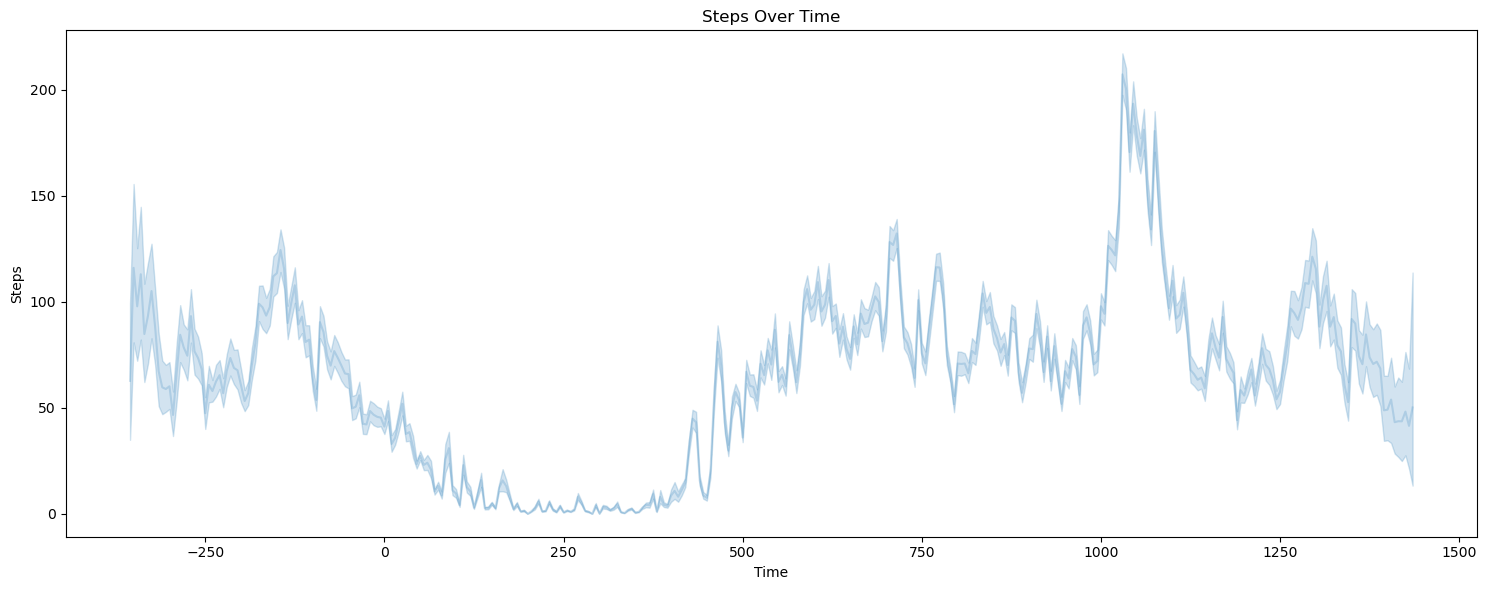

In [52]:
plt.figure(figsize=(15, 6))

sns.lineplot(x='actual_time', y='steps_value', data=p01_steps, alpha = 0.2)
    
plt.title('Steps Over Time')
plt.xlabel('Time')
plt.ylabel('Steps')

plt.tight_layout() 
plt.show()

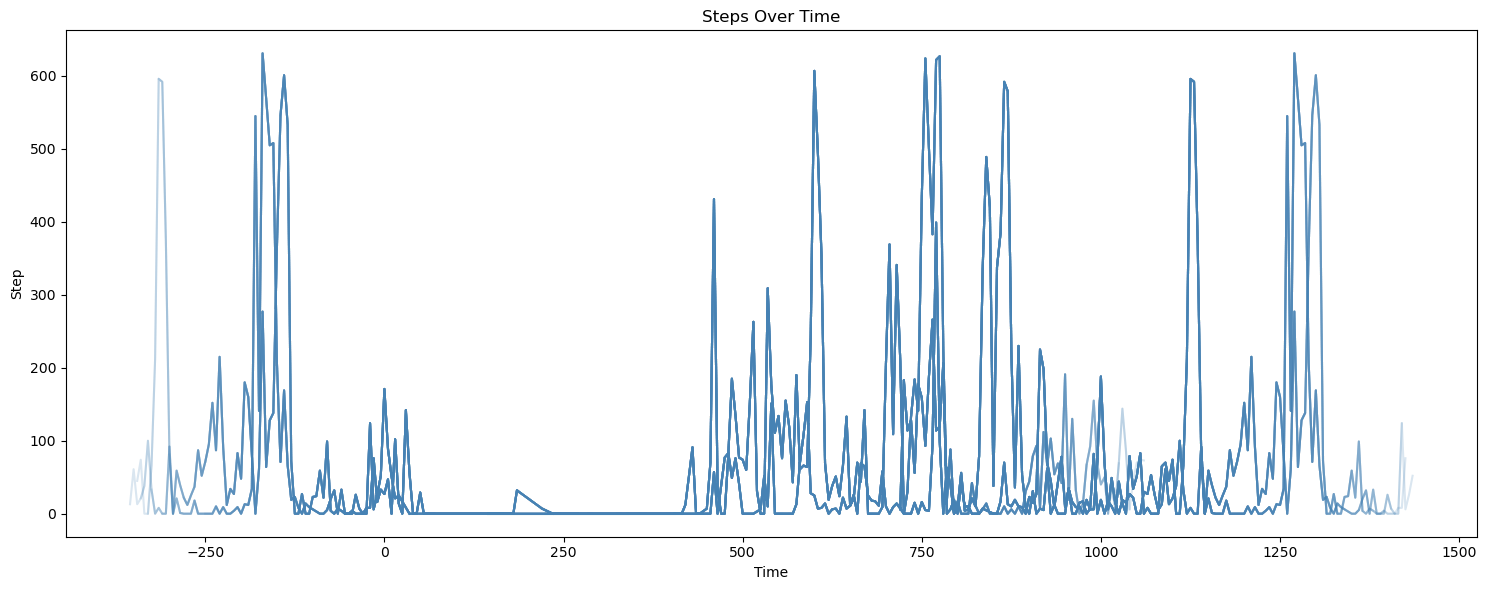

In [56]:
plt.figure(figsize=(15, 6))
for session in p01_steps['session'].unique()[0:501]:
    df = p01_steps[p01_steps['session'] == str(session)]
    sns.lineplot(x='actual_time', y='steps_value', data=df, alpha = 0.2, color = 'steelblue')
    
plt.title('Steps Over Time')
plt.xlabel('Time')
plt.ylabel('Step')

plt.tight_layout() 
plt.show()

### Combine

/var/folders/2r/vz71dl552fd4t6lk1z7s6_bh0000gn/T/ipykernel_13155/3574854474.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


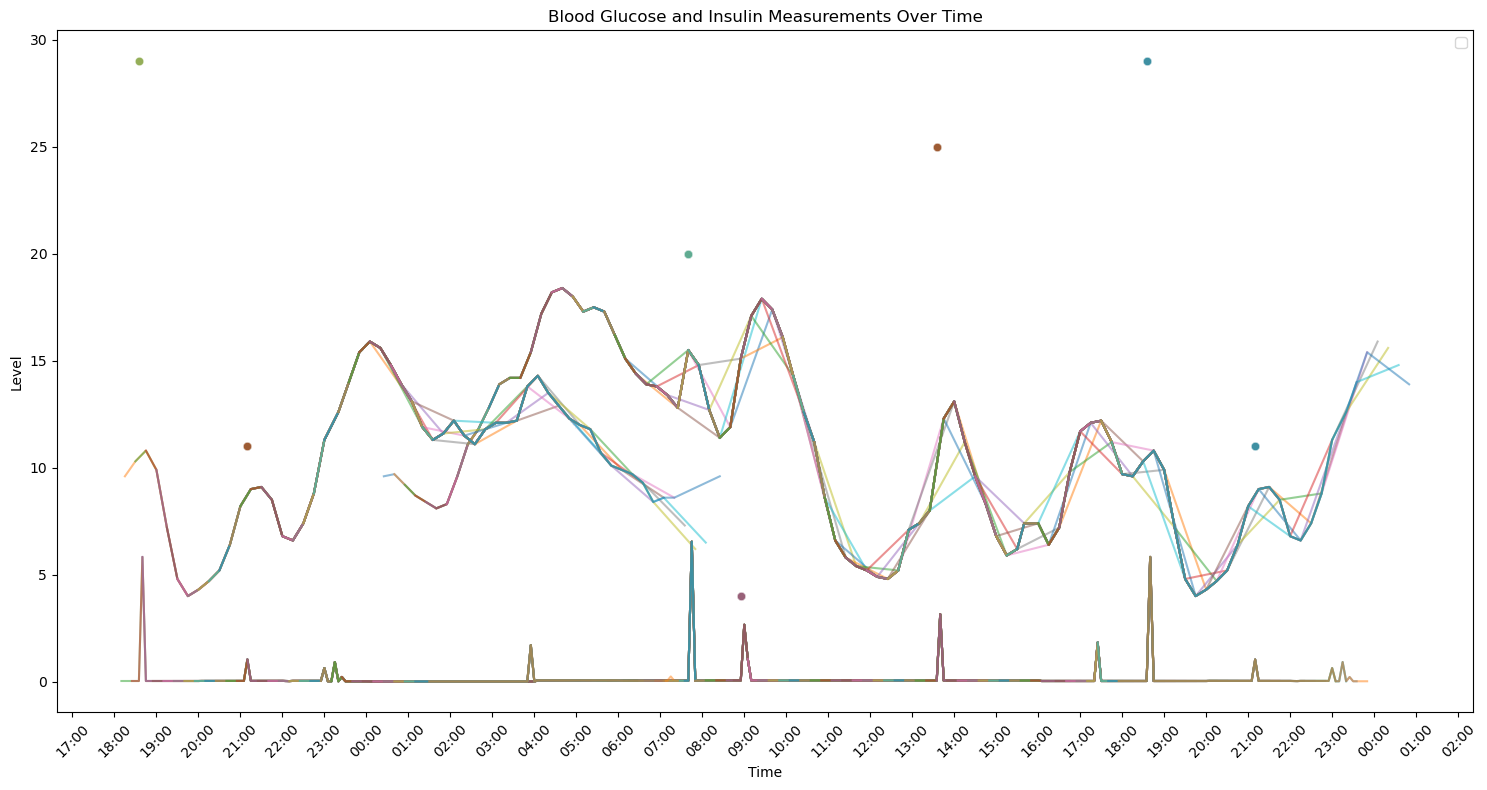

In [23]:
# Combine both plots

# Create a single figure
plt.figure(figsize=(15, 8))

# Plot blood glucose
for session in p01_bg['session'].unique()[0:101]:
    df = p01_bg[p01_bg['session'] == str(session)]
    sns.lineplot(x='actual_datetime', y='bg_value', data=df, alpha=0.5)

# Plot insulin on the same axes
for session in p01_ins['session'].unique()[0:101]:
    df = p01_ins[p01_ins['session'] == str(session)]
    sns.lineplot(x='actual_datetime', y='ins_value', data=df, alpha=0.5)
    
for session in p01_carbs['session'].unique()[0:101]:
    df = p01_carbs[p01_carbs['session'] == str(session)]
    sns.scatterplot(x='actual_datetime', y='carbs_value', data=df, alpha = 0.5)

plt.title('Blood Glucose and Insulin Measurements Over Time')
plt.xlabel('Time')
plt.ylabel('Level')

# Format x-axis to show only time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Adjust the number of ticks to prevent overcrowding
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))

plt.xticks(rotation=45)

# Add legend
plt.legend()

plt.tight_layout()
plt.show()
